### AML2203 - Advanced Python AI and ML Tools - Final Project

__Group Members:__
1) Aanal Patel - C0910376
2) Aniketh Vaglapuram - C0903304
3) Bimal Shresta - C0919385
4) Danilo Diaz - C0889539
5) Ernie Sumoso - C0881591 
6) Siddharth Yadav - C0907985

### 1. EDA
Let's dive into our web scrapped real-world data obtained from the OpenDota API (https://docs.opendota.com/#section/Introduction).

We built a project on GitHub (https://github.com/NILodio/dota2Analytics) and develop multiple Python scripts to make various API calls, 

and merge the results into one unified dataset, saving it as a CSV file.

The scripts are located in __/src/data__ within the GitHub project.

The API calls used were: (https://api.opendota.com/api/)
- /matches/{match_id}
- /proMatches?less_than_match_id={match_id}
- /teams/{team_id}
- /teams/{team_id}/heroes
- /teams/{team_id}/players

These API calls and starting features were selected based on experience and knowledge about the videogame.

Now that we have a dataset with 20k rows (10 hours to generate), let's perform an __Exploratory Data Analysis__.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

Loading the dataset from the our generated files.

In [2]:
# read dataset from csv file
df = pd.read_csv('matches_20000.csv')

# displaying the raw data
df.tail()

match_id  start_time  radiant_team_id        radiant_name  \
19995  7289930641  1692339416        8629315.0      Wiser Warriors   
19996  7289926197  1692339282        8582076.0    Team Disillusion   
19997  7289913798  1692338142        8961813.0             SHAOLIN   
19998  7289887554  1692336286        8629317.0    Bright Crusaders   
19999  7289878493  1692335558        8864178.0  Marvelous Warriors   

       dire_team_id         dire_name  leagueid  \
19995     8629317.0  Bright Crusaders     15026   
19996     9018710.0        Holy Grail     15689   
19997     8893825.0    Lucky Bulldogs     15480   
19998     8629315.0    Wiser Warriors     15026   
19999     9018528.0            Crew X     15480   

                                    league_name  series_type  region  ...  \
19995                            Destiny league          1.0     3.0  ...   
19996  Road to TI 2023 - CN Regional Qualifiers          1.0    17.0  ...   
19997                           Ancients League          1.0     3.0  ...   
19998                            Destiny league          1.0     3.0  ...   
19999                           Ancients League          1.0     3.0  ...   

       team2_hero1_wins  team2_hero2_gamesPlayed  team2_hero2_wins  \
19995              14.0                     81.0              47.0   
19996              13.0                     22.0              13.0   
19997              24.0                    100.0              50.0   
19998             153.0                    149.0              80.0   
19999              12.0                     44.0              24.0   

       team2_hero3_gamesPlayed  team2_hero3_wins  team2_hero4_gamesPlayed  \
19995                     68.0              37.0                    106.0   
19996                     19.0              15.0                     13.0   
19997                      8.0               5.0                      8.0   
19998                    125.0              66.0                    198.0   
19999                    109.0              59.0                     70.0   

       team2_hero4_wins  team2_hero5_gamesPlayed  team2_hero5_wins  \
19995              57.0                     67.0              32.0   
19996              10.0                     10.0               4.0   
19997               3.0                     57.0              28.0   
19998              98.0                    395.0             195.0   
19999              41.0                     57.0              32.0   

       radiant_win  
19995        False  
19996        False  
19997         True  
19998        False  
19999         True  

[5 rows x 95 columns]

In [3]:
# show shape and column names
def display_shape_and_colnames(df, colnames=True):
    print("# Rows:", df.shape[0])
    print("# Columns:", df.shape[1])
    if colnames: print("Column names:", df.columns)

display_shape_and_colnames(df)

# Rows: 20000
# Columns: 95
Column names: Index(['match_id', 'start_time', 'radiant_team_id', 'radiant_name',
       'dire_team_id', 'dire_name', 'leagueid', 'league_name', 'series_type',
       'region', 'team2_ban1', 'team1_ban1', 'team1_ban2', 'team2_ban2',
       'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1', 'team1_hero1',
       'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2', 'team2_hero2',
       'team2_hero3', 'team1_hero3', 'team1_hero4', 'team2_hero4',
       'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7', 'team2_hero5',
       'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins', 'team1_losses',
       'team1_last_match_time', 'team2_id', 'team2_rating', 'team2_wins',
       'team2_losses', 'team2_last_match_time', 'team1_player1_id',
       'team1_player1_gamesPlayed', 'team1_player1_wins', 'team1_player2_id',
       'team1_player2_gamesPlayed', 'team1_player2_wins', 'team1_player3_id',
       'team1_player3_gamesPlayed', 'team1_player3_wins', 

In [4]:
# display column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match_id                   20000 non-null  int64  
 1   start_time                 20000 non-null  int64  
 2   radiant_team_id            19011 non-null  float64
 3   radiant_name               18757 non-null  object 
 4   dire_team_id               18939 non-null  float64
 5   dire_name                  18663 non-null  object 
 6   leagueid                   20000 non-null  int64  
 7   league_name                20000 non-null  object 
 8   series_type                19830 non-null  float64
 9   region                     19010 non-null  float64
 10  team2_ban1                 18916 non-null  float64
 11  team1_ban1                 18917 non-null  float64
 12  team1_ban2                 18917 non-null  float64
 13  team2_ban2                 18915 non-null  flo

In [5]:
# display dataset statistic description
df.describe()

match_id    start_time  radiant_team_id  dire_team_id  \
count  2.000000e+04  2.000000e+04     1.901100e+04  1.893900e+04   
mean   7.491779e+09  1.702883e+09     8.522366e+06  8.527768e+06   
std    1.133717e+08  5.914084e+06     1.671038e+06  1.658594e+06   
min    7.289878e+09  1.692336e+09     5.000000e+00  5.000000e+00   
25%    7.394384e+09  1.697981e+09     8.629324e+06  8.629324e+06   
50%    7.496969e+09  1.703045e+09     8.957156e+06  8.961813e+06   
75%    7.587085e+09  1.707947e+09     9.176102e+06  9.187066e+06   
max    7.679792e+09  1.712767e+09     9.402213e+06  9.402213e+06   

           leagueid   series_type        region    team2_ban1    team1_ban1  \
count  20000.000000  19830.000000  19010.000000  18916.000000  18917.000000   
mean   15744.364550      0.962229      5.879537     74.408120     73.968177   
std      548.965213      0.464739      7.006555     33.723107     33.284654   
min    12903.000000      0.000000      1.000000      1.000000      1.000000   
25%    15674.000000      1.000000      3.000000     52.000000     52.000000   
50%    15895.000000      1.000000      3.000000     74.000000     74.000000   
75%    16059.000000      1.000000      8.000000     98.000000     98.000000   
max    16527.000000      3.000000     38.000000    138.000000    138.000000   

         team1_ban2  ...  team2_hero1_gamesPlayed  team2_hero1_wins  \
count  18917.000000  ...             17888.000000      17888.000000   
mean      72.637363  ...                58.649597         30.245304   
std       35.101024  ...                82.875507         41.733186   
min        1.000000  ...                 1.000000          0.000000   
25%       49.000000  ...                 9.000000          5.000000   
50%       72.000000  ...                30.000000         15.000000   
75%       98.000000  ...                74.000000         39.000000   
max      138.000000  ...               558.000000        272.000000   

       team2_hero2_gamesPlayed  team2_hero2_wins  team2_hero3_gamesPlayed  \
count             17888.000000      17888.000000             17888.000000   
mean                 57.310599         29.499665                49.072674   
std                  79.718382         40.834267                65.697642   
min                   1.000000          0.000000                 1.000000   
25%                   9.000000          4.000000                 8.000000   
50%                  30.000000         15.000000                27.000000   
75%                  74.000000         38.000000                63.000000   
max                 558.000000        272.000000               558.000000   

       team2_hero3_wins  team2_hero4_gamesPlayed  team2_hero4_wins  \
count      17888.000000             17888.000000      17888.000000   
mean          25.358788                44.318817         22.854819   
std           34.177227                55.628915         29.075629   
min            0.000000                 1.000000          0.000000   
25%            4.000000                 7.000000          3.000000   
50%           13.000000                25.000000         12.000000   
75%           33.000000                60.000000         31.000000   
max          272.000000               558.000000        272.000000   

       team2_hero5_gamesPlayed  team2_hero5_wins  
count             17888.000000      17888.000000  
mean                 41.631093         21.330948  
std                  51.445967         26.806825  
min                   1.000000          0.000000  
25%                   6.000000          3.000000  
50%                  23.000000         11.000000  
75%                  56.000000         30.000000  
max                 558.000000        272.000000  

[8 rows x 91 columns]

Changing the data type of datetime columns. Originally these columns are Unix timestamps (integers):
- start time
- team 1 last match time
- team 2 last match time

In [6]:
# function to change columns into datetime
def convert_columns_to_datatime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], unit='s')

date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time'] # set the date columns
convert_columns_to_datatime(df, date_columns) # convert columns into datetime
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   start_time             20000 non-null  datetime64[ns]
 1   team1_last_match_time  18734 non-null  datetime64[ns]
 2   team2_last_match_time  18646 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 468.9 KB


Let's identify our __numerical__ and __categorical__ features.

In [7]:
# function to identify numerical columns within a dataframe
def get_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # set all numeric types
    return df.select_dtypes(include=numeric_types).columns.to_list() # return numeric columns as a list

# set and display numeric columns
numeric_columns = get_numerical_columns(df)
print("# Numerical columns:", len(numeric_columns))
print("Numeric columns:", numeric_columns)

# Numerical columns: 88
Numeric columns: ['match_id', 'radiant_team_id', 'dire_team_id', 'leagueid', 'series_type', 'region', 'team2_ban1', 'team1_ban1', 'team1_ban2', 'team2_ban2', 'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1', 'team1_hero1', 'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2', 'team2_hero2', 'team2_hero3', 'team1_hero3', 'team1_hero4', 'team2_hero4', 'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7', 'team2_hero5', 'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins', 'team1_losses', 'team2_id', 'team2_rating', 'team2_wins', 'team2_losses', 'team1_player1_id', 'team1_player1_gamesPlayed', 'team1_player1_wins', 'team1_player2_id', 'team1_player2_gamesPlayed', 'team1_player2_wins', 'team1_player3_id', 'team1_player3_gamesPlayed', 'team1_player3_wins', 'team1_player4_id', 'team1_player4_gamesPlayed', 'team1_player4_wins', 'team1_player5_id', 'team1_player5_gamesPlayed', 'team1_player5_wins', 'team2_player1_id', 'team2_player1_gamesPlayed', 'team2_p

In [8]:
# identifying non-numerical columns
def get_non_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # set all numeric types
    return df.select_dtypes(exclude=numeric_types).columns.to_list() # exclude numeric types from the columns

# set and display non-numeric columns
non_numeric_columns = get_non_numerical_columns(df)
print("# Non-numerical columns:", len(non_numeric_columns))
print("Non-numeric columns:", non_numeric_columns)

# Non-numerical columns: 7
Non-numeric columns: ['start_time', 'radiant_name', 'dire_name', 'league_name', 'team1_last_match_time', 'team2_last_match_time', 'radiant_win']


Now that we identified numerical and categorical columns, let's __visualize the column counts__.

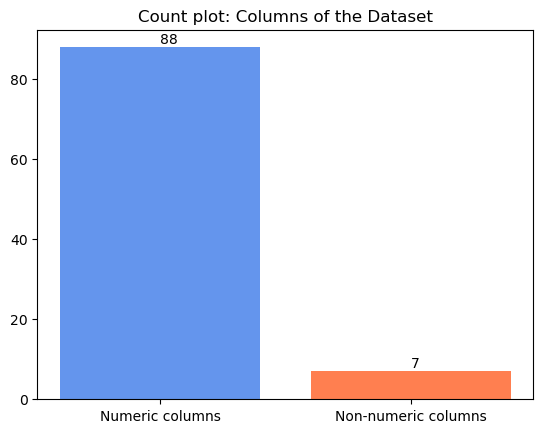

In [9]:
# function to plot the count of numeric vs non-numeric columns
def plot_column_counts(df):
    # get column names (numeric and non-numeric)
    numeric_columns = get_numerical_columns(df)
    non_numeric_columns = get_non_numerical_columns(df)
    
    # plot the bar chart and set title
    data = [('Numeric columns', len(numeric_columns)), ('Non-numeric columns', len(non_numeric_columns))]
    plt.bar(x=[x[0] for x in data ], height=[y[1] for y in data], color=['cornflowerblue', 'coral'])
    plt.title("Count plot: Columns of the Dataset")
    
    # annotate values above the bars
    max_y = max([y[1] for y in data])
    for i, (x, y) in enumerate(data):
        plt.annotate(str(y), (i, y + 0.01 * max_y))
    plt.show()

plot_column_counts(df)

In [10]:
# function to check number & percentage of missing values
def check_overall_missing_values(df):
    mean = np.mean(df.isna().sum()) # calculate the mean of missing values from all columns
    median = np.median(df.isna().sum()) # calculate the median of missing values from all columns
    total = df.shape[0] - df.dropna().shape[0] # calculate the total rows with missing values
    # display the missing value metrics
    print(f"Average of Missing Values per column: {mean:.2f}")
    print(f"Median of Missing Values per column: {median:.0f}")
    print(f"% Average of Missing Values: {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Missing Values: {median*100/df.shape[0]:.2f} %")
    print(f"Total Missing Values on dataset: {total}")
    print(f"Total Missing Values on dataset: {total*100/df.shape[0]:.2f} %")
    
check_overall_missing_values(df)

Average of Missing Values per column: 1371.36
Median of Missing Values per column: 1266
% Average of Missing Values: 6.86 %
% Median of Missing Values: 6.33 %
Total Missing Values on dataset: 2923
Total Missing Values on dataset: 14.62 %


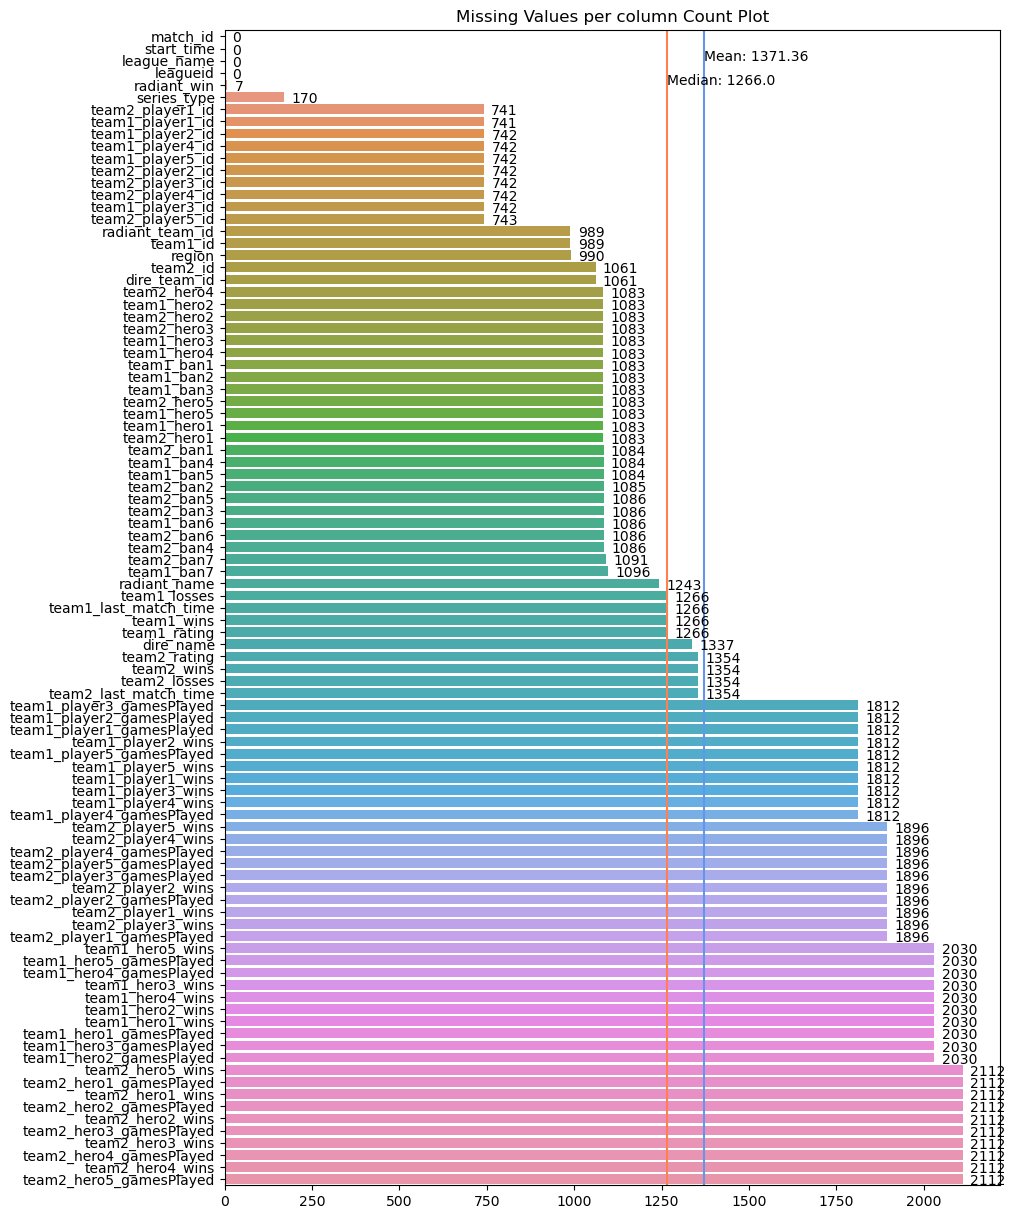

In [11]:
# function to plot missing values (or unique values) per column, with mean and median as vertical lines
def plot_column_values(df, counting='missing_values'):
    # set the plot size
    plt.figure(figsize=(10,15))
    # plot the bars of missing or unique values
    if counting == "missing_values":
        values = df.isna().sum().sort_values(ascending=True)
    elif counting == "unique_values":
        values = df.nunique().sort_values(ascending=True)
    column_names = values.index
    sns.barplot(x=values, y=column_names)

    # calculate & plot mean & median vertical lines, annotating corresponding values
    mean = np.mean(values)
    median = np.median(values)
    plt.axvline(x=mean, color='cornflowerblue')
    plt.axvline(x=median, color='coral')
    plt.annotate("Mean: "+str(round(mean, 2)), (0.5 + mean, 2))
    plt.annotate("Median: "+str(median), (0.5 + median, 4))

    # annotate missing values (or unique values) for each column
    max_x = max(values)
    for i, (missing_value, column) in enumerate(zip(values, column_names)):
        plt.annotate(str(missing_value), (missing_value + 0.01 * max_x, i + 0.5))
    plt.title(counting.replace("_"," ").title() + " per column Count Plot")
    plt.show()
    
plot_column_values(df, 'missing_values')

In [12]:
# function to show number and % of duplicated rows
def check_duplicated_values(df):
    print("# Duplicated Values:", df.duplicated().sum())
    print("% Duplicated Values:", df.duplicated().mean() * 100, "%")

check_duplicated_values(df)

# Duplicated Values: 0
% Duplicated Values: 0.0 %


In [13]:
# function to check number & percentage of unique values
def check_overall_unique_values(df):
    mean = np.mean(df.nunique())
    median = np.median(df.nunique())
    print(f"Average of Unique Values per column: {mean:.2f}")
    print(f"Median of Unique Values per column: {median:.0f}")
    print(f"% Average of Unique Values per column (vs total rows): {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Unique Values per column (vs total rows): {median*100/df.shape[0]:.2f} %")
        
check_overall_unique_values(df)

Average of Unique Values per column: 934.47
Median of Unique Values per column: 254
% Average of Unique Values per column (vs total rows): 4.67 %
% Median of Unique Values per column (vs total rows): 1.27 %


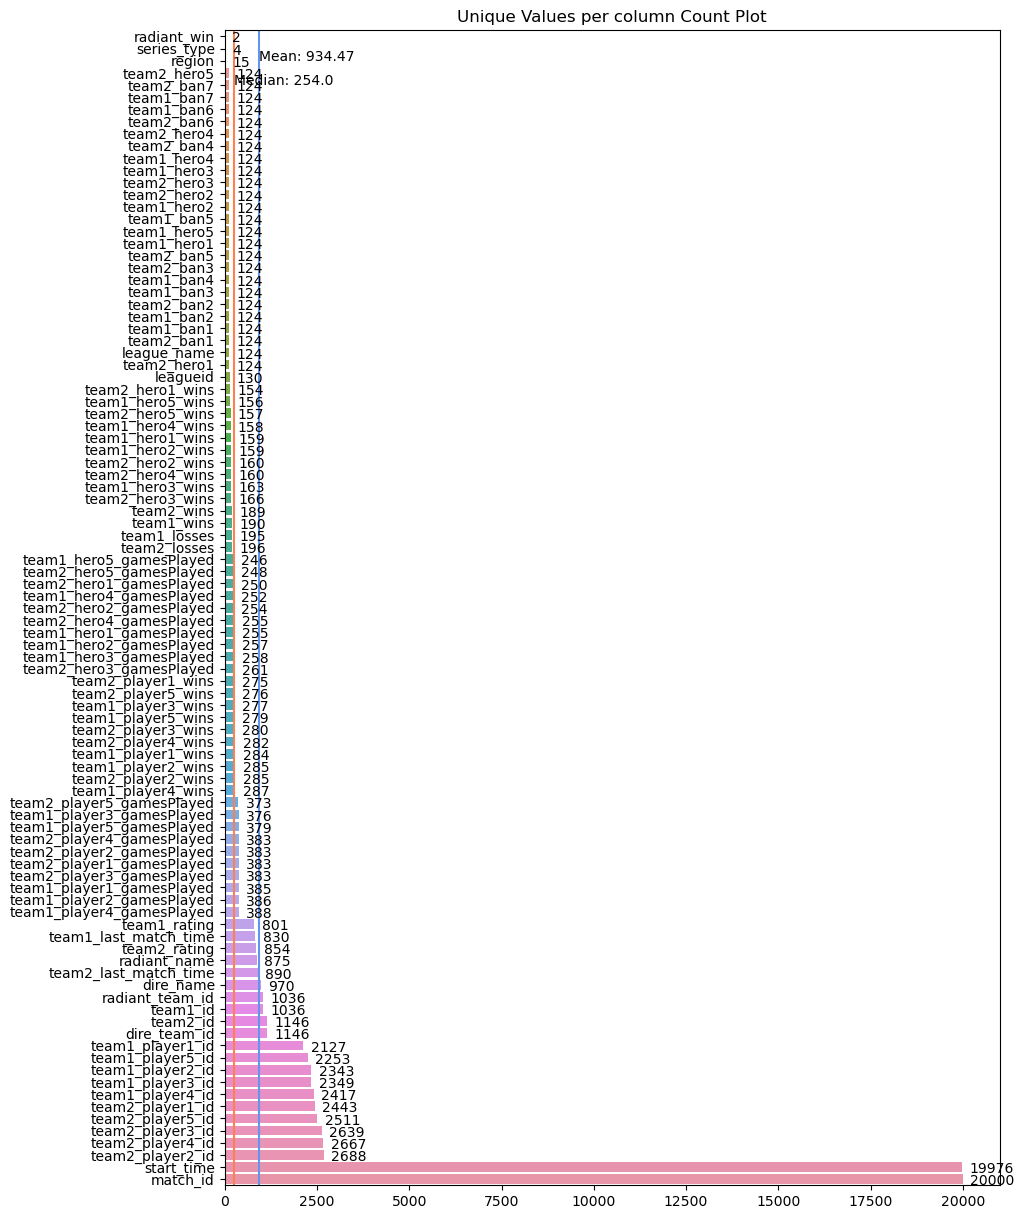

In [14]:
# use the same function to plot number of unique values per column
plot_column_values(df, 'unique_values')

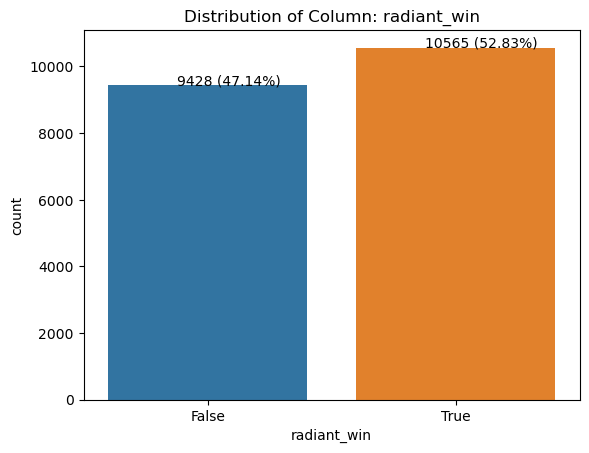

In [15]:
# function to plot the target column distribution
def plot_column_distribution_countplot(df, column):
    # countplot of the column parameter
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of Column: {column}')
    
    # annotate counts above each bar
    for i, value in enumerate(df[column].value_counts().sort_values()):
        percentage = round(value * 100 / df.shape[0], 2)
        plt.annotate(str(value) + f" ({percentage}%)", (i - 0.125, value + 5))
    plt.show()

plot_column_distribution_countplot(df, 'radiant_win')

Our target values look __balanced__, as both values have nearly 50% each.

Let's plot other columns distributions

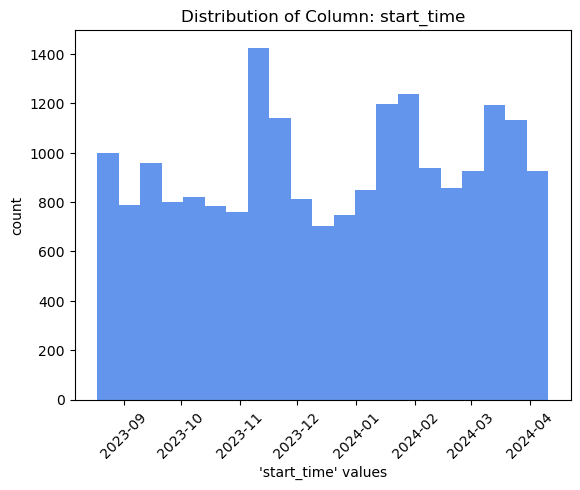

In [16]:
# function to plot a column distribution using histogram
def plot_column_distribution_histogram(df, column, rotation=0, bins=21, color='cornflowerblue'):
    # plot histogram using bins and color from parameters
    plt.hist(df[column], bins=bins, color=color)
    plt.xticks(rotation=rotation) # set the x labels rotation
    plt.xlabel("'" + column + "' values") # set axis labels and title
    plt.ylabel('count')
    plt.title(f'Distribution of Column: {column}')
    plt.show()
    
plot_column_distribution_histogram(df, 'start_time', rotation=45)

Column 'start_time' (starting time of the matches) has a similarity with a __uniform distribution__.

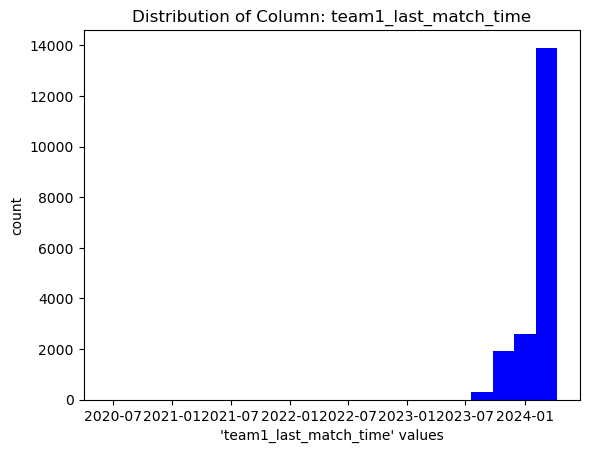

In [17]:
# plot the column 'team1_last_match_time' distribution
plot_column_distribution_histogram(df, 'team1_last_match_time', color='b')

The distribution of the column 'team1_last_match_time' is __left-skewed__, with skew lower than zero.

This suggests most teams have played recently, while some few teams haven't played for a few days.

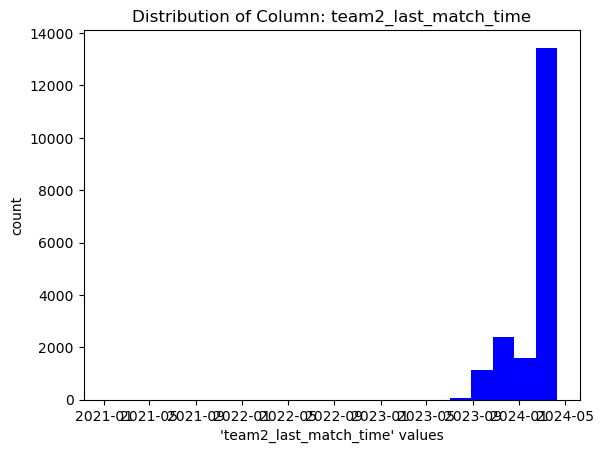

In [18]:
# plot the column 'team2_last_match_time' distribution
plot_column_distribution_histogram(df, 'team2_last_match_time', color='b')

Same happens the distribution of the column 'team1_last_match_time', it presents a skew lower than zero, or __left-skewed__.

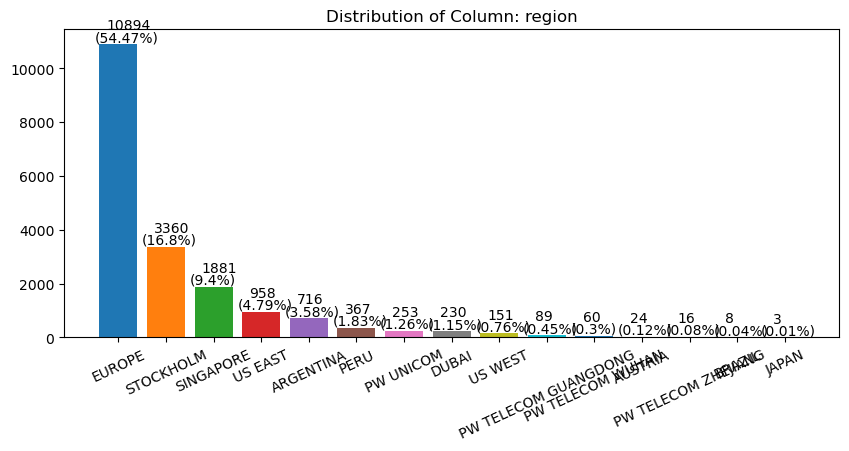

In [19]:
# function to plot the distribution of a column using bars
def plot_column_distribution_bar(df, target, rotation=0, constants={}, figsize=(10, 5)):
    # set the frequencies and unique values of the column
    frequencies = df[target].value_counts()
    unique_values = frequencies.index
    
    # if 'constants' parameter was set, we map the unique values into some other values from the constants dictionary
    if constants != {}:
        unique_values = [constants[str(int(value))] for value in unique_values if not math.isnan(value)]
    unique_values = [value[:22] for value in unique_values] # limit the label to max 22 characters for plotting purposes (this doesn't affect the data)
    
    # set the plot size, title and label rotations, and plot the bars
    plt.figure(figsize=figsize)
    plt.bar(x=unique_values, height=frequencies, color=mcolors.TABLEAU_COLORS)
    plt.title(f'Distribution of Column: {target}')
    plt.xticks(rotation=rotation)
    
    # annotate frequencies and percentages above each bar
    max_y = max(frequencies)
    for i, (value, frequency) in enumerate(zip(unique_values, frequencies)):
        percentage = round(frequency * 100 / df.shape[0], 2)
        plt.annotate(str(frequency), (i - 0.25, frequency + max_y * 0.05))
        plt.annotate(f"({percentage}%)", (i - 0.5, frequency + max_y * 0.01))
    plt.show()

# set a dictionary to map the actual values to the corresponding regions
regions_constants = {"1":"US WEST","2":"US EAST","3":"EUROPE","5":"SINGAPORE","6":"DUBAI","7":"AUSTRALIA","8":"STOCKHOLM","9":"AUSTRIA","10":"BRAZIL","11":"SOUTHAFRICA","12":"PW TELECOM SHANGHAI","13":"PW UNICOM","14":"CHILE","15":"PERU","16":"INDIA","17":"PW TELECOM GUANGDONG","18":"PW TELECOM ZHEJIANG","19":"JAPAN","20":"PW TELECOM WUHAN","25":"PW UNICOM TIANJIN","37":"TAIWAN","38":"ARGENTINA"}
plot_column_distribution_bar(df, 'region', rotation=25, constants=regions_constants, figsize=(10, 4))

Most matches 

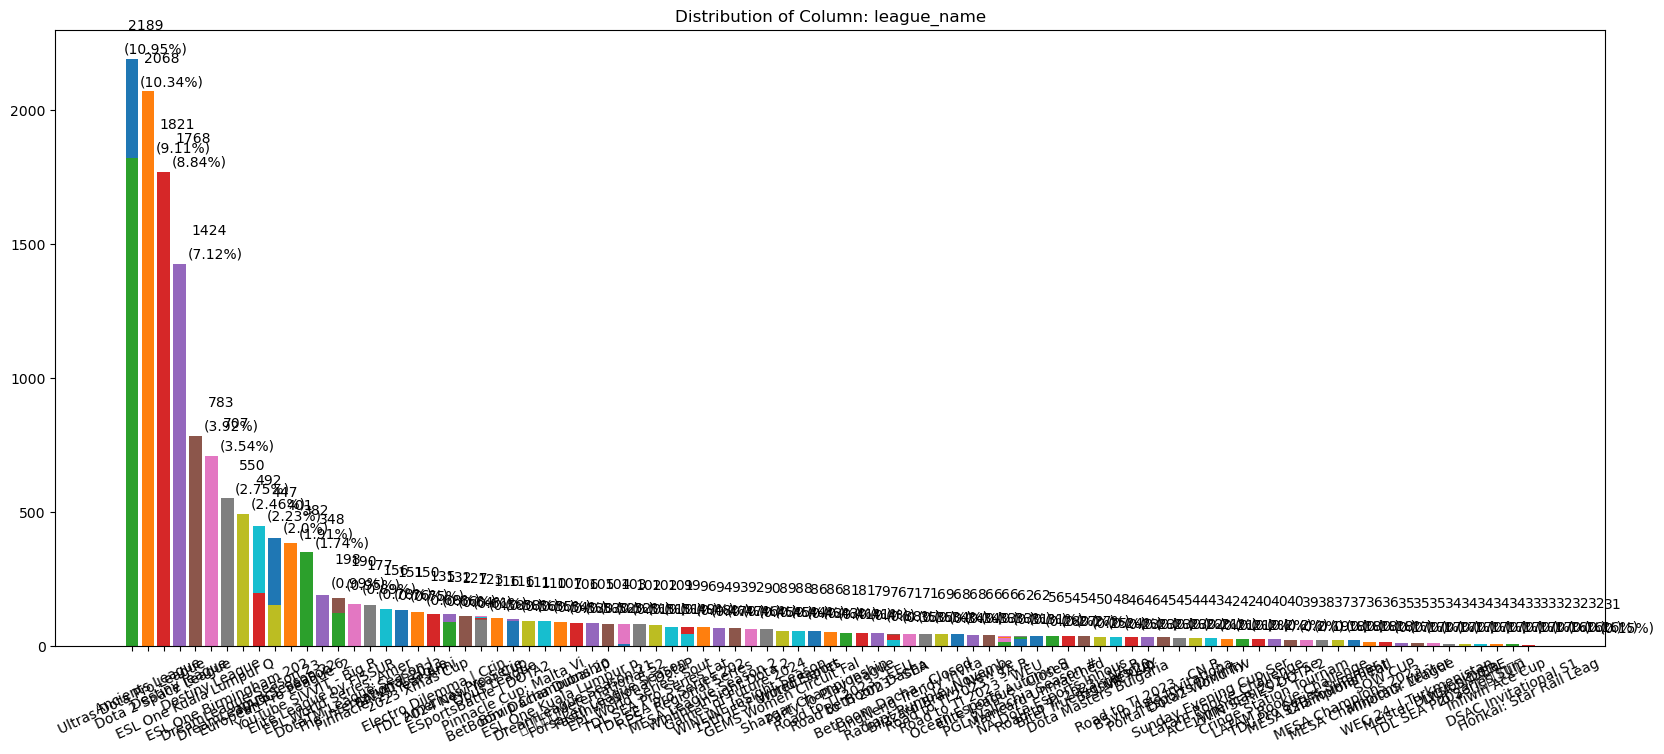

In [20]:
plot_column_distribution_bar(df, 'league_name', rotation=25, figsize=(20, 8))

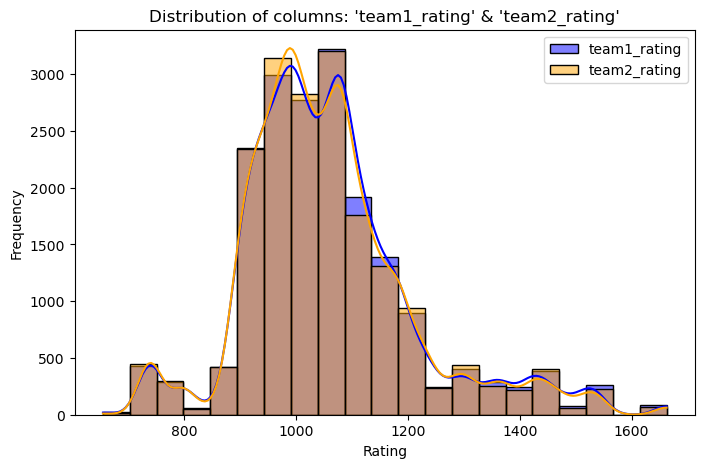

In [21]:
# create another function that uses seaborn to plot 2+ columns distribution
def plot_columns_distribution_histplot(df, columns, bins=21, colors=[], title="", xlabel=""):
    plt.figure(figsize=(8, 5))
    for column, color in zip(columns, colors):
        sns.histplot(data=df, x=column, bins=bins, kde=True, label=column, color=color, palette='hls')
    plt.title("Distribution of columns: " + title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

columns = ['team1_rating', 'team2_rating']
colors=['blue', 'orange']
title = "'team1_rating' & 'team2_rating'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Rating")

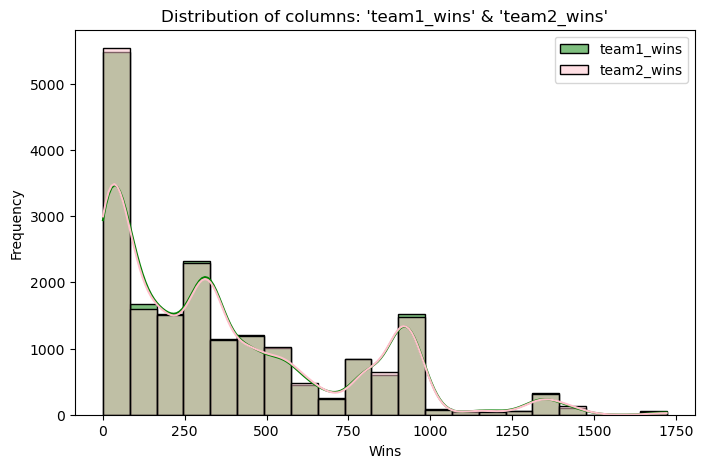

In [22]:
columns = ['team1_wins', 'team2_wins']
colors=['green', 'pink']
title = "'team1_wins' & 'team2_wins'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Wins")

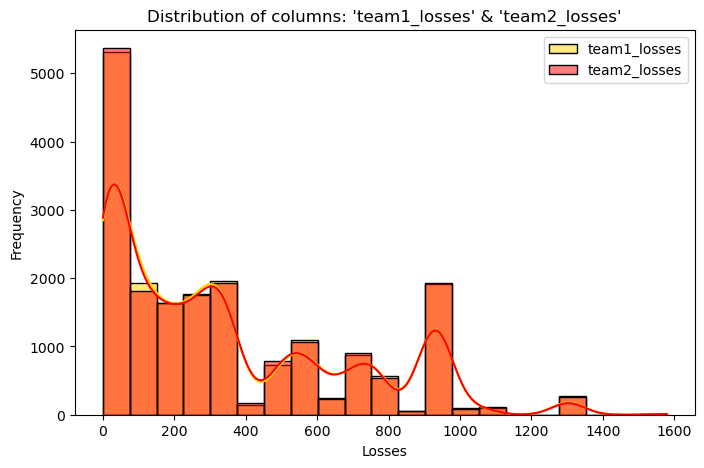

In [23]:
columns = ['team1_losses', 'team2_losses']
colors=['gold', 'red']
title = "'team1_losses' & 'team2_losses'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Losses")

Let's identify outliers by ploting boxplots.

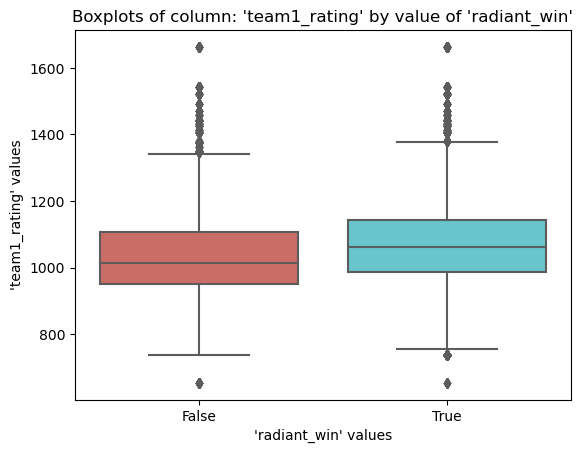

In [24]:
# function to plot boxplots per value of a column using seaborn
def plot_column_distribution_boxplot(df, colX, colY, palette='hls'):
    sns.boxplot(data=df, x=colX, y=colY, palette=palette)
    plt.xlabel("'"+colX+"' values")
    plt.ylabel("'"+colY+"' values")
    plt.title("Boxplots of column: '"+colY+"' by value of '"+colX+"'")
    plt.show()
    
plot_column_distribution_boxplot(df, 'radiant_win', 'team1_rating', palette='hls')

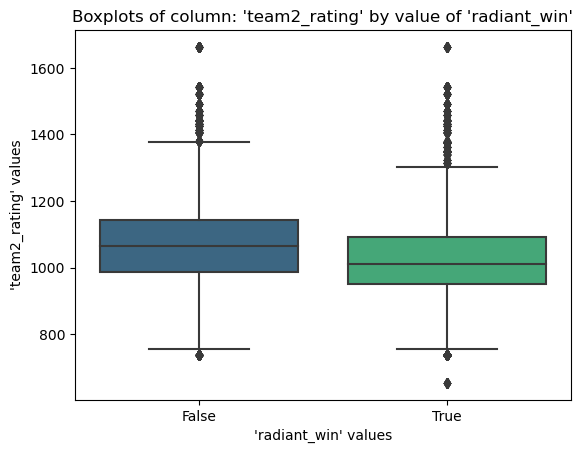

In [25]:
plot_column_distribution_boxplot(df, 'radiant_win', 'team2_rating', palette='viridis')

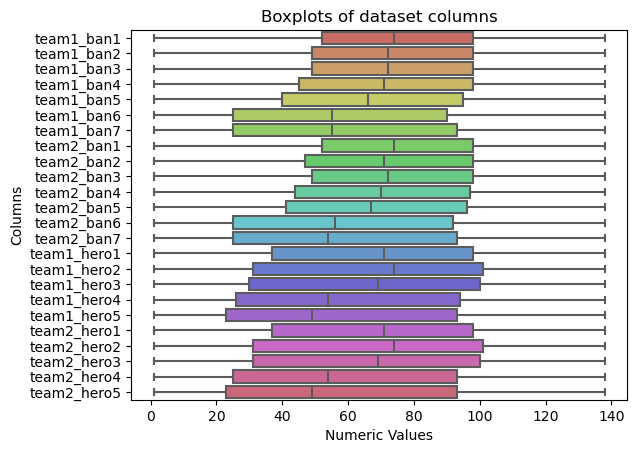

In [26]:
# function to plot boxplots from a set of columns using seaborn
def plot_columns_distribution_boxplot(df, palette='hls', xticks=0, orient="h"):
    sns.boxplot(data=df, palette=palette, orient=orient)
    if orient == "v":
        plt.xlabel("Columns")
        plt.xticks(rotation=xticks)
        plt.ylabel("Numeric Values")
    else:
        plt.xlabel("Numeric Values")
        plt.ylabel("Columns")
    plt.title("Boxplots of dataset columns")
    plt.show()

columns_chunk_0 = ['team1_ban1', 'team1_ban2', 'team1_ban3', 'team1_ban4', 'team1_ban5', 'team1_ban6', 'team1_ban7',
                   'team2_ban1', 'team2_ban2', 'team2_ban3', 'team2_ban4', 'team2_ban5', 'team2_ban6', 'team2_ban7']
columns_chunk_1 = ['team1_hero1', 'team1_hero2', 'team1_hero3', 'team1_hero4', 'team1_hero5',
                   'team2_hero1', 'team2_hero2', 'team2_hero3', 'team2_hero4', 'team2_hero5']
plot_columns_distribution_boxplot(df[columns_chunk_0 + columns_chunk_1], palette='hls')

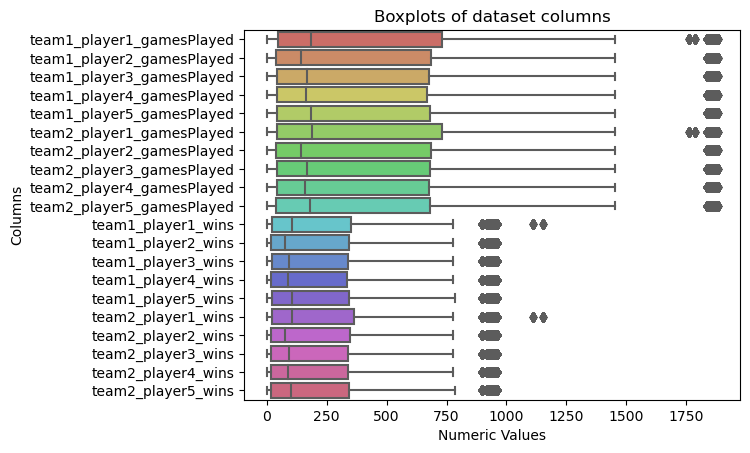

In [27]:
columns_chunk_2 = ['team1_player1_gamesPlayed', 'team1_player2_gamesPlayed', 'team1_player3_gamesPlayed', 'team1_player4_gamesPlayed', 'team1_player5_gamesPlayed',
                   'team2_player1_gamesPlayed', 'team2_player2_gamesPlayed', 'team2_player3_gamesPlayed', 'team2_player4_gamesPlayed', 'team2_player5_gamesPlayed']
columns_chunk_3 = ['team1_player1_wins', 'team1_player2_wins', 'team1_player3_wins', 'team1_player4_wins', 'team1_player5_wins',
                   'team2_player1_wins', 'team2_player2_wins', 'team2_player3_wins', 'team2_player4_wins', 'team2_player5_wins']
plot_columns_distribution_boxplot(df[columns_chunk_2 + columns_chunk_3], palette='hls')

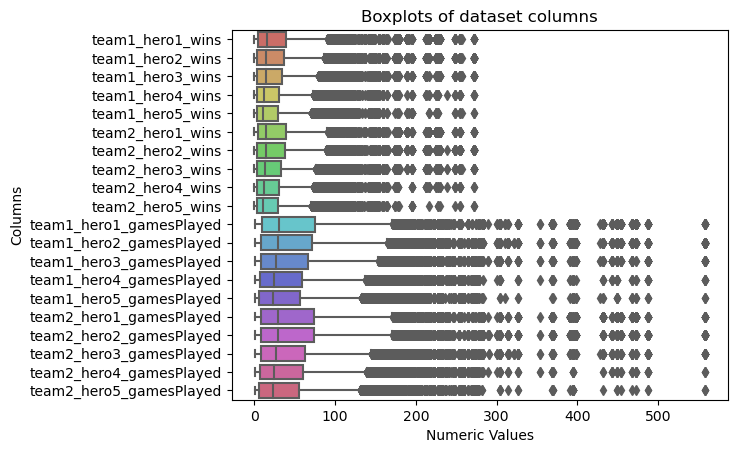

In [28]:
columns_chunk_4 = ['team1_hero1_wins', 'team1_hero2_wins', 'team1_hero3_wins', 'team1_hero4_wins', 'team1_hero5_wins',
                   'team2_hero1_wins', 'team2_hero2_wins', 'team2_hero3_wins', 'team2_hero4_wins', 'team2_hero5_wins']
columns_chunk_5 = ['team1_hero1_gamesPlayed', 'team1_hero2_gamesPlayed', 'team1_hero3_gamesPlayed', 'team1_hero4_gamesPlayed', 'team1_hero5_gamesPlayed',
                   'team2_hero1_gamesPlayed', 'team2_hero2_gamesPlayed', 'team2_hero3_gamesPlayed', 'team2_hero4_gamesPlayed', 'team2_hero5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk_4 + columns_chunk_5], palette='hls')

In [29]:
def get_target_top_correlated_features(df, target, top_n=10, map_target=True):
    df_corr = df.copy()
    if map_target:
        df_corr[target] = df_corr[target].map({True:1, False:0})
    df_corr = df_corr.select_dtypes(include=['number'])
    correlation_matrix = df_corr.corr()
    correlation_target = correlation_matrix[[target]].sort_values(by=target, ascending=False)
    return correlation_target[:top_n] if top_n > 0 else correlation_target[top_n:]

get_target_top_correlated_features(df, 'radiant_win', top_n=10)

radiant_win
radiant_win            1.000000
team1_rating           0.130883
team1_hero5_wins       0.047514
team1_hero3_wins       0.040332
team1_hero4_wins       0.040044
team1_wins             0.032190
region                 0.031663
team1_hero2_wins       0.026080
leagueid               0.021026
team1_player1_wins     0.019188

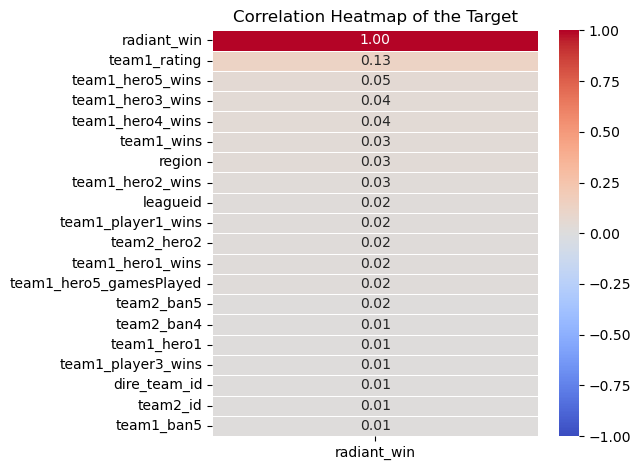

In [30]:
def plot_heatmap(matrix, xticks=0):
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of the Target')
    plt.xticks(rotation=xticks)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

correlation_matrix = get_target_top_correlated_features(df, 'radiant_win', top_n=20)
plot_heatmap(correlation_matrix)

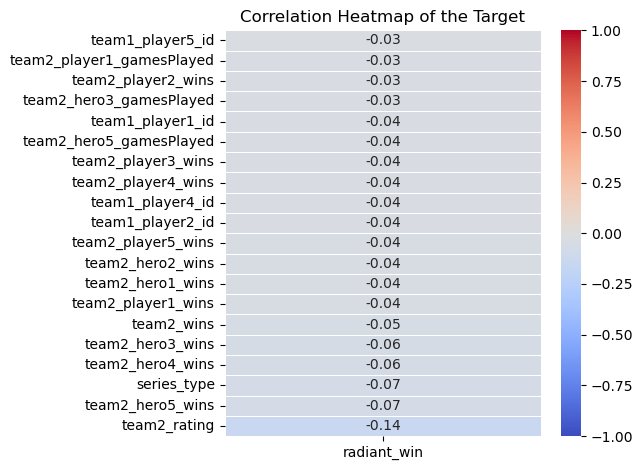

In [31]:
correlation_matrix = get_target_top_correlated_features(df, 'radiant_win', top_n=-20)
plot_heatmap(correlation_matrix)

### 2. Data Pre-processing & Normalization
- __missing values__
- __duplicates__
- __detect outliers & treatment__

__Dealing with missing values__

Let's perform a omission technique for 2 reasons:
- They represent a small percentage (< 10%) of the entire dataset.
- It won't be appropriate to impute missing ID values (from teams, heroes, or players) with a centraly tendency measurement because they are unique identifiers.

In [32]:
check_overall_missing_values(df)
display_shape_and_colnames(df, colnames=False)

Average of Missing Values per column: 1371.36
Median of Missing Values per column: 1266
% Average of Missing Values: 6.86 %
% Median of Missing Values: 6.33 %
Total Missing Values on dataset: 2923
Total Missing Values on dataset: 14.62 %
# Rows: 20000
# Columns: 95


In [33]:
# drop missing values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [34]:
check_overall_missing_values(df)
display_shape_and_colnames(df, colnames=False)

Average of Missing Values per column: 0.00
Median of Missing Values per column: 0
% Average of Missing Values: 0.00 %
% Median of Missing Values: 0.00 %
Total Missing Values on dataset: 0
Total Missing Values on dataset: 0.00 %
# Rows: 17077
# Columns: 95


__Dealing with duplicates__

We don't have duplcated rows for now. We will check later after the pre-processing as well.

In [35]:
check_duplicated_values(df)

# Duplicated Values: 0
% Duplicated Values: 0.0 %


__Detect Outliers and treatment__

Let's detect outliers with the 1.5*IQR rule

In [36]:
# function to get column outliers outside the 1.5*IQR range
def get_column_outliers(df, column, iqr_factor=1.5, return_indexes=True, return_lh=False,  print_=False):
    # implement the 1.5*IQR rule to detect outliers from the dataset column
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - iqr_factor * IQR
    upper = q3 + iqr_factor * IQR
    if return_lh: return lower, upper
    
    # print lowest and highest value from the 1.5*IQR
    if print_:
        print(f"Column '{column}' outliers:")
        print("Lowest value above outliers:\t", lower)
        print("Highest value below outliers:\t", upper)
    
    # save outliers outside that range and return them as dataframe (or indexes)
    outliers = [index for index, value in df[column].items() if value < lower or value > upper]
    if return_indexes: return outliers
    return df.loc[outliers]

get_column_outliers(df, 'team1_rating', return_indexes=False, print_=True)[['team1_rating']]

Column 'team1_rating' outliers:
Lowest value above outliers:	 717.8025
Highest value below outliers:	 1368.0065000000002


team1_rating
0           1439.95
2           1521.52
8           1412.25
11          1491.47
12          1412.25
...             ...
16990       1456.81
16992       1469.74
16995       1540.62
17034       1380.60
17068       1380.60

[1081 rows x 1 columns]

In [37]:
def get_columns_with_outliers(df):
    numeric_columns = get_numerical_columns(df)
    outlier_columns = []
    text = ""
    for column in numeric_columns:
        outliers = get_column_outliers(df, column)
        if(len(outliers) == 0): continue
        percentage = round(len(outliers)*100 / df.shape[0], 2)
        text += f"'{column}'" + '-'*(30-len(column)) + f"> {len(outliers):3} outliers ({percentage:.2f} %)\n"
        outlier_columns.append(column)
    print("# Columns with outliers:", len(outlier_columns))
    print(text)
    return outlier_columns
    
columns_with_outliers = get_columns_with_outliers(df)

# Columns with outliers: 53
'radiant_team_id'---------------> 1455 outliers (8.52 %)
'dire_team_id'------------------> 1534 outliers (8.98 %)
'leagueid'----------------------> 2470 outliers (14.46 %)
'series_type'-------------------> 1522 outliers (8.91 %)
'region'------------------------> 1186 outliers (6.95 %)
'team1_id'----------------------> 1455 outliers (8.52 %)
'team1_rating'------------------> 1081 outliers (6.33 %)
'team1_wins'--------------------> 474 outliers (2.78 %)
'team1_losses'------------------>  10 outliers (0.06 %)
'team2_id'----------------------> 1534 outliers (8.98 %)
'team2_rating'------------------> 982 outliers (5.75 %)
'team2_wins'--------------------> 460 outliers (2.69 %)
'team2_losses'------------------>  16 outliers (0.09 %)
'team1_player1_gamesPlayed'-----> 2061 outliers (12.07 %)
'team1_player1_wins'------------> 105 outliers (0.61 %)
'team1_player2_gamesPlayed'-----> 2062 outliers (12.07 %)
'team1_player2_wins'------------> 2062 outliers (12.07 %)
'team

We can not do anything about the ID outliers as they are unique identifiers.

'series_type' and 'region' are categorical columns, so let's remove them from our outlier columns.

'team1_last_match_time' and 'team2_last_match_time' are date columns, let's remove them as well.

In [38]:
columns_with_id = [col for col in columns_with_outliers if 'id' in col]
columns_with_outliers = [col for col in columns_with_outliers if col not in columns_with_id]
columns_with_outliers = [col for col in columns_with_outliers if col not in ['series_type', 'region', 'team1_last_match_time', 'team2_last_match_time']]
print("# Columns with outliers:", len(columns_with_outliers))
columns_with_outliers

# Columns with outliers: 46


['team1_rating',
 'team1_wins',
 'team1_losses',
 'team2_rating',
 'team2_wins',
 'team2_losses',
 'team1_player1_gamesPlayed',
 'team1_player1_wins',
 'team1_player2_gamesPlayed',
 'team1_player2_wins',
 'team1_player3_gamesPlayed',
 'team1_player3_wins',
 'team1_player4_gamesPlayed',
 'team1_player4_wins',
 'team1_player5_gamesPlayed',
 'team1_player5_wins',
 'team2_player1_gamesPlayed',
 'team2_player1_wins',
 'team2_player2_gamesPlayed',
 'team2_player2_wins',
 'team2_player3_gamesPlayed',
 'team2_player3_wins',
 'team2_player4_gamesPlayed',
 'team2_player4_wins',
 'team2_player5_gamesPlayed',
 'team2_player5_wins',
 'team1_hero1_gamesPlayed',
 'team1_hero1_wins',
 'team1_hero2_gamesPlayed',
 'team1_hero2_wins',
 'team1_hero3_gamesPlayed',
 'team1_hero3_wins',
 'team1_hero4_gamesPlayed',
 'team1_hero4_wins',
 'team1_hero5_gamesPlayed',
 'team1_hero5_wins',
 'team2_hero1_gamesPlayed',
 'team2_hero1_wins',
 'team2_hero2_gamesPlayed',
 'team2_hero2_wins',
 'team2_hero3_gamesPlayed',
 

__We will NOT apply trimming to our outliers because we already lost a chunk of rows during the missing values omission.__

Let's try the 2 remaining techniques:
- Flooring & Capping
- Log Transformation

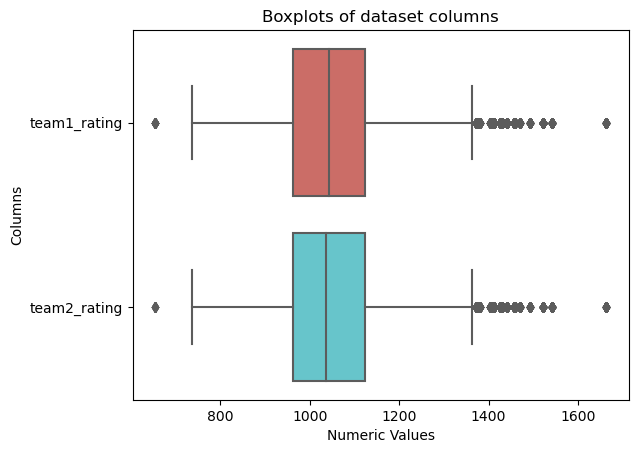

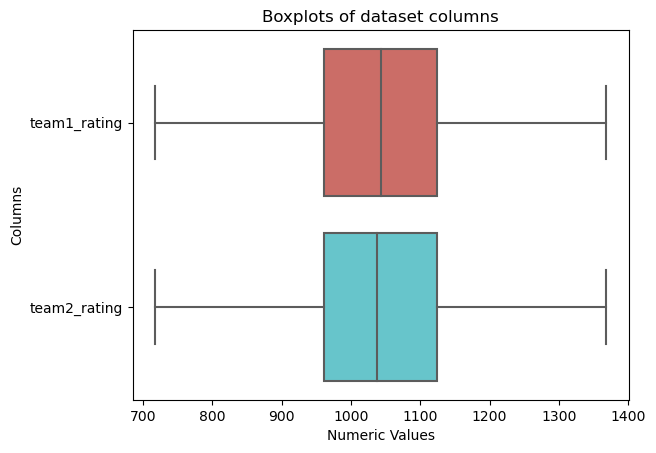

In [39]:
# apply flooring and capping technique on dataset
def apply_flooring_capping(df_original):
    # apply on a copy of the dataset
    df = df_original.copy()
    # loop through all columns
    for column in df.columns.to_list():
        # calculate floor and ceiling and get indexes of the outliers
        lowest, highest = get_column_outliers(df, column, return_lh=True)
        outlier_indexes = get_column_outliers(df, column, return_indexes=True)
        
        # floor and cap the outliers (looping through indexes)
        for index in outlier_indexes:
            current_value = df.iloc[index, df.columns.get_loc(column)]
            df.iloc[index, df.columns.get_loc(column)] = lowest if current_value < lowest else highest
    return df

columns_chunk1 = ['team1_rating', 'team2_rating']
plot_columns_distribution_boxplot(df[columns_chunk1], palette='hls')
df[columns_chunk1] = apply_flooring_capping(df[columns_chunk1])
plot_columns_distribution_boxplot(df[columns_chunk1], palette='hls')

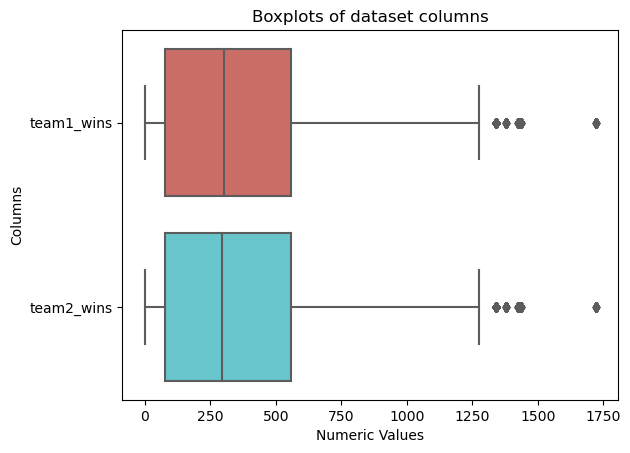

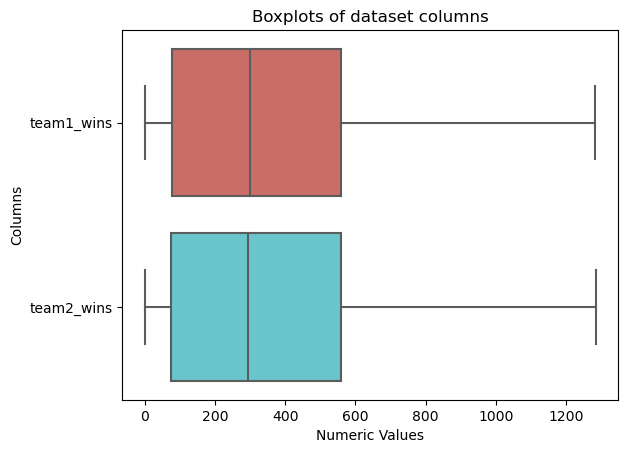

In [40]:
columns_chunk2 = ['team1_wins', 'team2_wins']
plot_columns_distribution_boxplot(df[columns_chunk2], palette='hls')
df[columns_chunk2] = apply_flooring_capping(df[columns_chunk2])
plot_columns_distribution_boxplot(df[columns_chunk2], palette='hls')

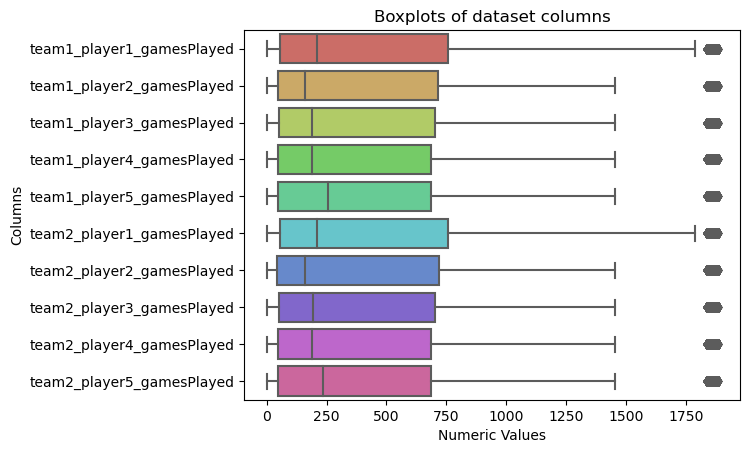

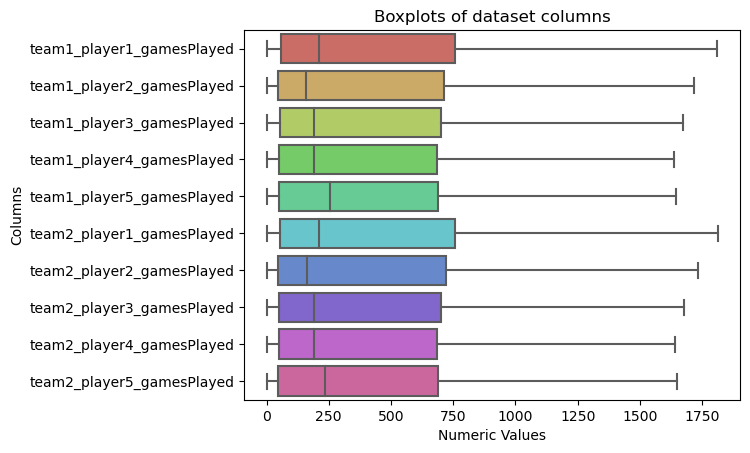

In [41]:
columns_chunk3 = ['team1_player1_gamesPlayed',
 'team1_player2_gamesPlayed',
 'team1_player3_gamesPlayed',
 'team1_player4_gamesPlayed',
 'team1_player5_gamesPlayed',
 'team2_player1_gamesPlayed',
 'team2_player2_gamesPlayed',
 'team2_player3_gamesPlayed',
 'team2_player4_gamesPlayed',
 'team2_player5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk3], palette='hls')
df[columns_chunk3] = apply_flooring_capping(df[columns_chunk3])
plot_columns_distribution_boxplot(df[columns_chunk3], palette='hls')

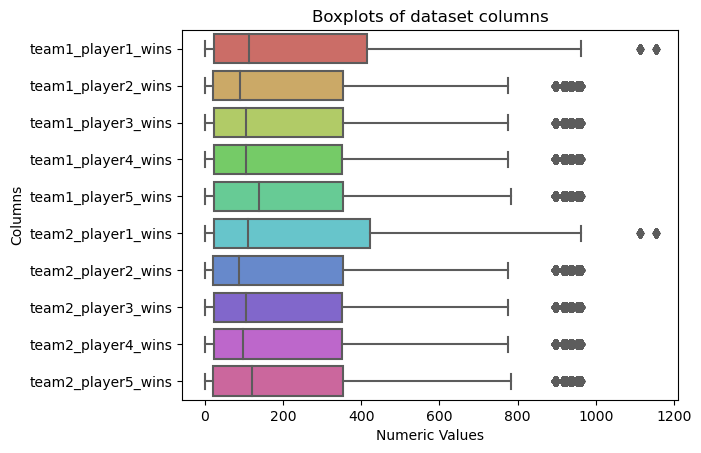

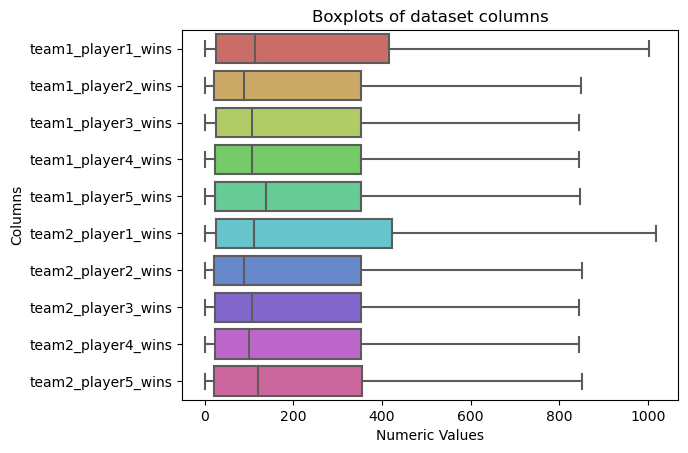

In [42]:
columns_chunk4 = ['team1_player1_wins',
 'team1_player2_wins',
 'team1_player3_wins',
 'team1_player4_wins',
 'team1_player5_wins',
 'team2_player1_wins',
 'team2_player2_wins',
 'team2_player3_wins',
 'team2_player4_wins',
 'team2_player5_wins']
plot_columns_distribution_boxplot(df[columns_chunk4], palette='hls')
df[columns_chunk4] = apply_flooring_capping(df[columns_chunk4])
plot_columns_distribution_boxplot(df[columns_chunk4], palette='hls')

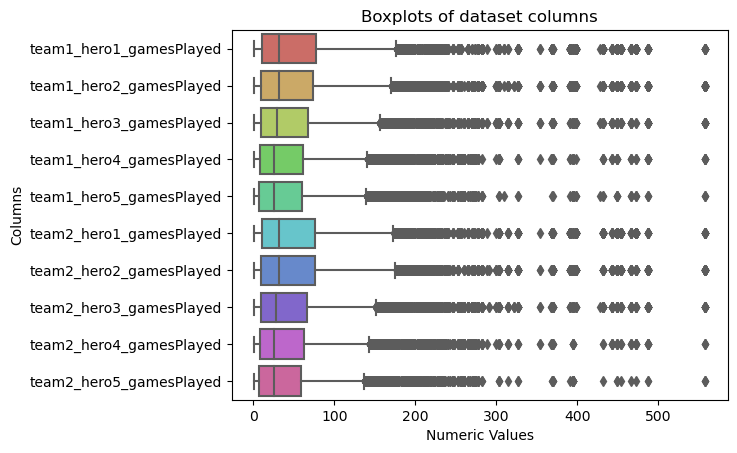

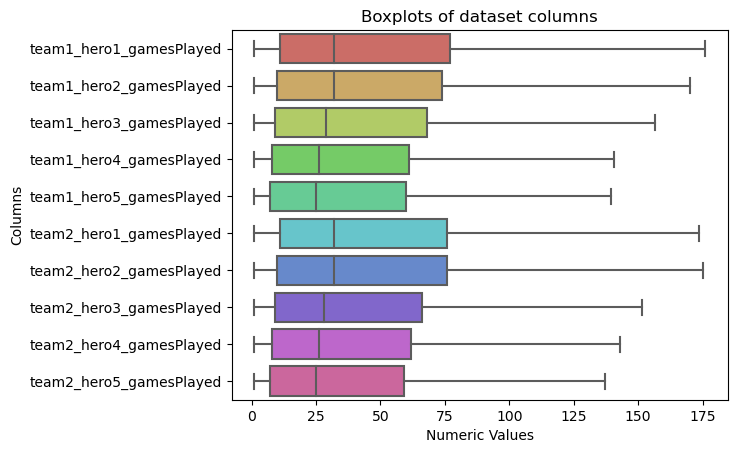

In [43]:
columns_chunk5 = ['team1_hero1_gamesPlayed',
 'team1_hero2_gamesPlayed',
 'team1_hero3_gamesPlayed',
 'team1_hero4_gamesPlayed',
 'team1_hero5_gamesPlayed',
 'team2_hero1_gamesPlayed',
 'team2_hero2_gamesPlayed',
 'team2_hero3_gamesPlayed',
 'team2_hero4_gamesPlayed',
 'team2_hero5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk5], palette='hls')
df[columns_chunk5] = apply_flooring_capping(df[columns_chunk5])
plot_columns_distribution_boxplot(df[columns_chunk5], palette='hls')

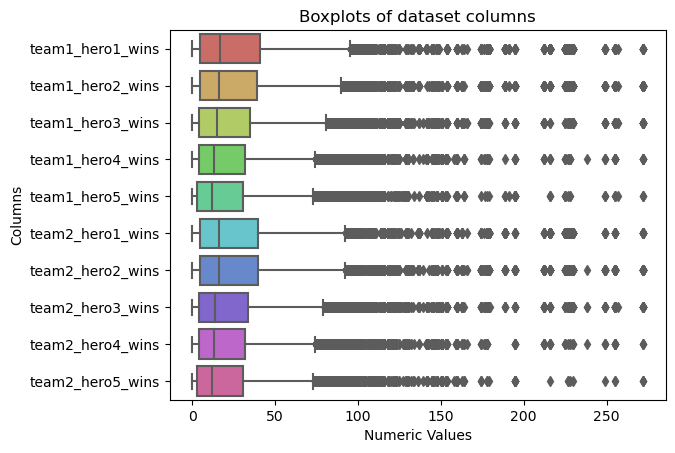

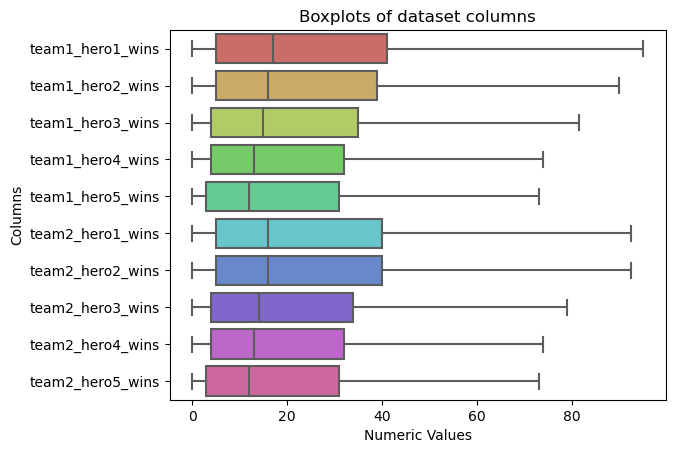

In [44]:
columns_chunk6 = ['team1_hero1_wins',
 'team1_hero2_wins',
 'team1_hero3_wins',
 'team1_hero4_wins',
 'team1_hero5_wins',
 'team2_hero1_wins',
 'team2_hero2_wins',
 'team2_hero3_wins',
 'team2_hero4_wins',
 'team2_hero5_wins']
plot_columns_distribution_boxplot(df[columns_chunk6], palette='hls')
df[columns_chunk6] = apply_flooring_capping(df[columns_chunk6])
plot_columns_distribution_boxplot(df[columns_chunk6], palette='hls')

We have seen the results with __flooring & capping__ technique, now let's try using a __log transformation__ and compare results.

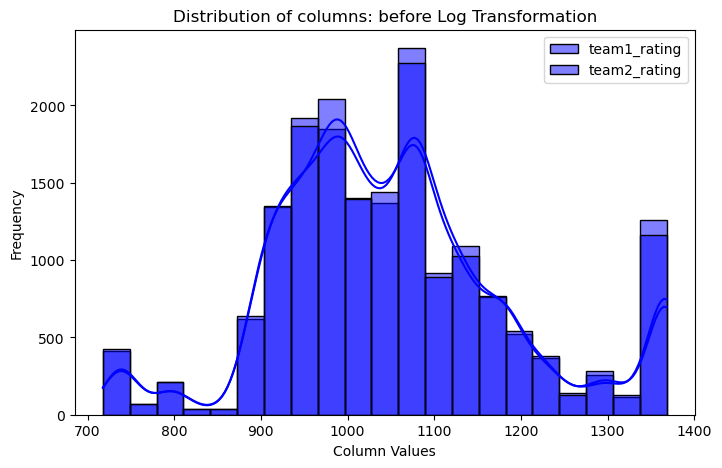

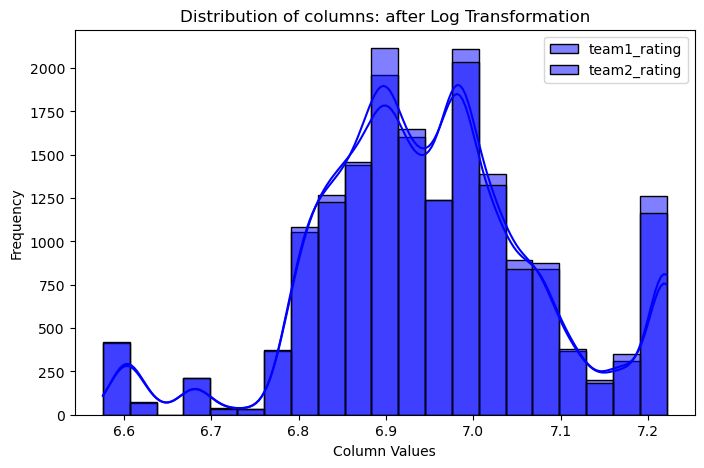

In [45]:
# apply log transformation technique on dataset
def apply_log_transformation(df_original):
    # apply on a copy of the dataset
    df = df_original.copy()
    # apply log to columns
    for column in df.columns.to_list():
        df[column] = df[column].map(lambda value : np.log(value) if value > 0 else 0)
    return df

colors = ['blue' for _ in range(len(columns_chunk1))]
plot_columns_distribution_histplot(df, columns=columns_chunk1, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk1] = apply_log_transformation(df[columns_chunk1])
plot_columns_distribution_histplot(df, columns=columns_chunk1, colors=colors, xlabel="Column Values", title='after Log Transformation')

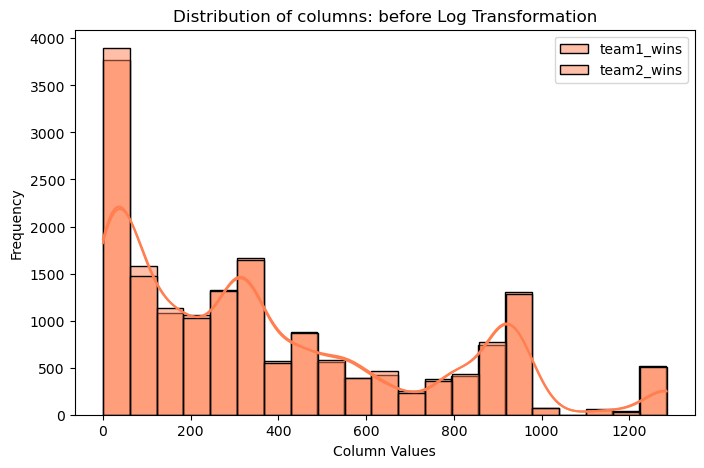

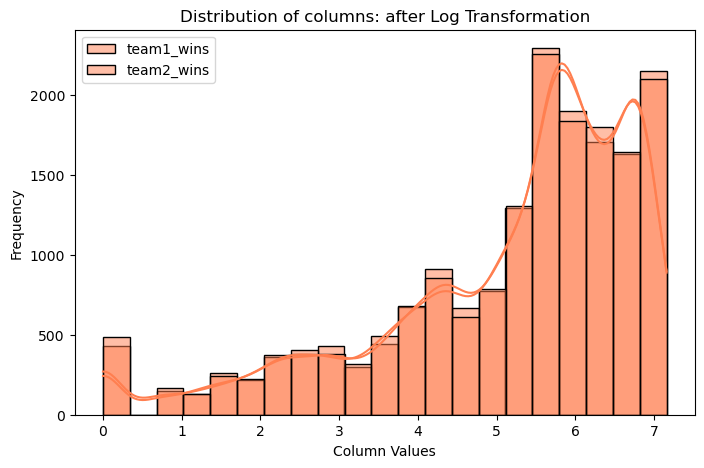

In [46]:
colors = ['coral' for _ in range(len(columns_chunk2))]
plot_columns_distribution_histplot(df, columns=columns_chunk2, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk2] = apply_log_transformation(df[columns_chunk2])
plot_columns_distribution_histplot(df, columns=columns_chunk2, colors=colors, xlabel="Column Values", title='after Log Transformation')

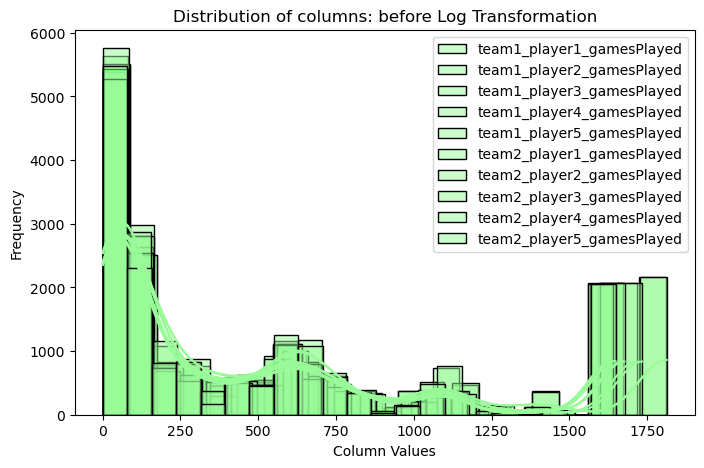

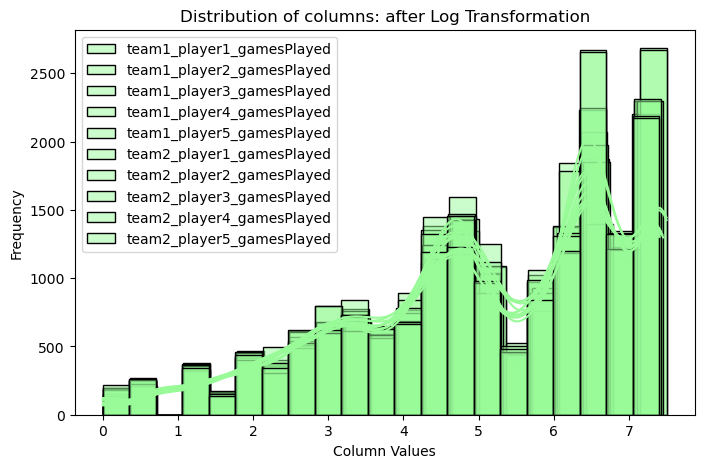

In [47]:
colors = ['palegreen' for _ in range(len(columns_chunk3))]
plot_columns_distribution_histplot(df, columns=columns_chunk3, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk3] = apply_log_transformation(df[columns_chunk3])
plot_columns_distribution_histplot(df, columns=columns_chunk3, colors=colors, xlabel="Column Values", title='after Log Transformation')

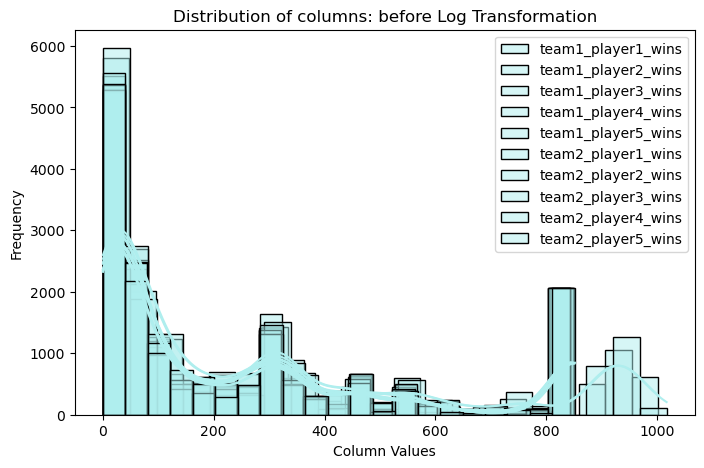

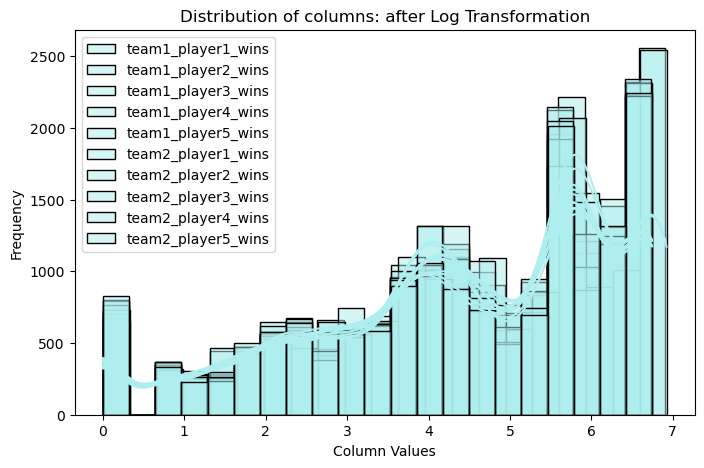

In [48]:
colors = ['paleturquoise' for _ in range(len(columns_chunk4))]
plot_columns_distribution_histplot(df, columns=columns_chunk4, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk4] = apply_log_transformation(df[columns_chunk4])
plot_columns_distribution_histplot(df, columns=columns_chunk4, colors=colors, xlabel="Column Values", title='after Log Transformation')

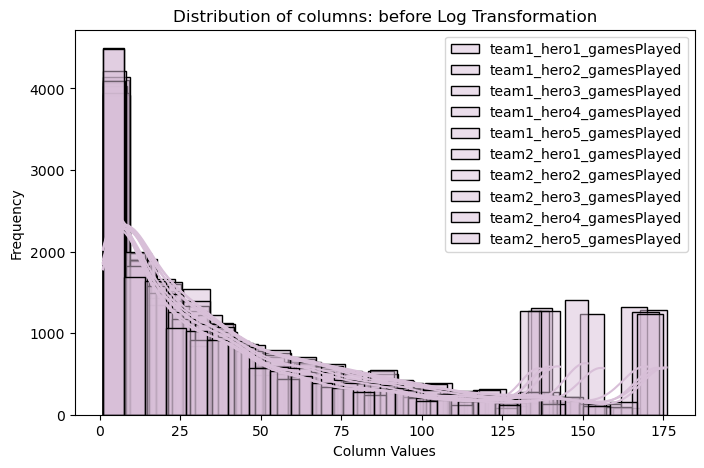

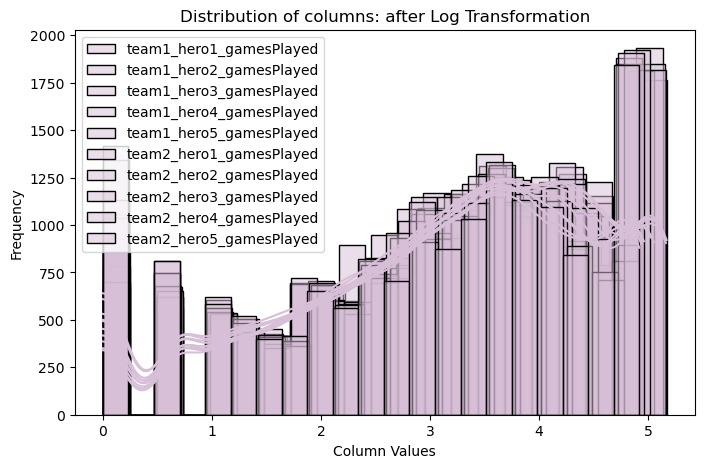

In [49]:
colors = ['thistle' for _ in range(len(columns_chunk5))]
plot_columns_distribution_histplot(df, columns=columns_chunk5, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk5] = apply_log_transformation(df[columns_chunk5])
plot_columns_distribution_histplot(df, columns=columns_chunk5, colors=colors, xlabel="Column Values", title='after Log Transformation')

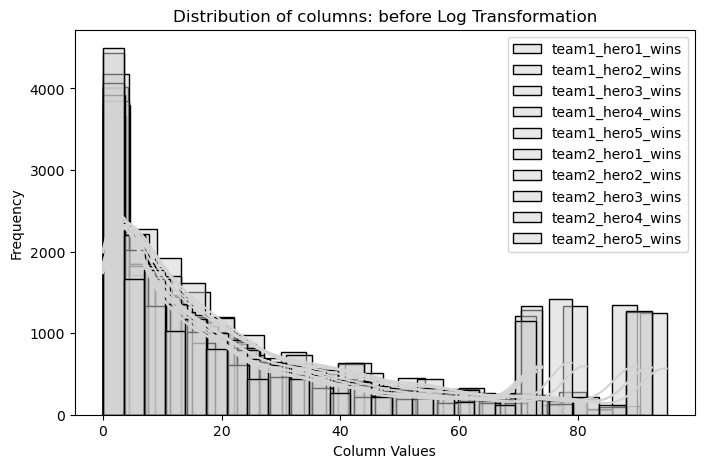

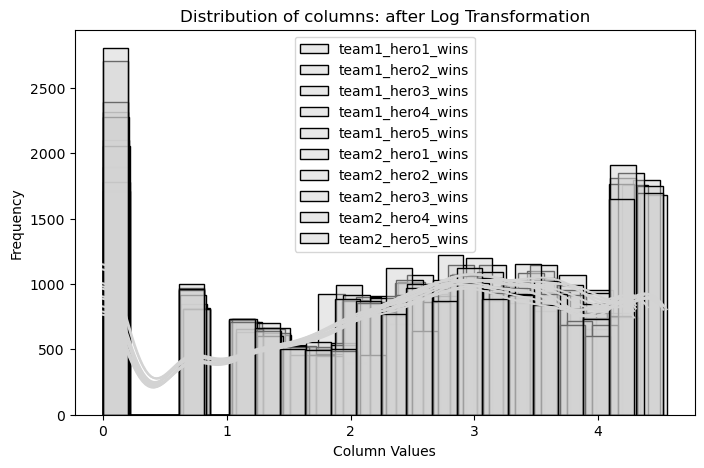

In [50]:
colors = ['lightgray' for _ in range(len(columns_chunk6))]
plot_columns_distribution_histplot(df, columns=columns_chunk6, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk6] = apply_log_transformation(df[columns_chunk6])
plot_columns_distribution_histplot(df, columns=columns_chunk6, colors=colors, xlabel="Column Values", title='after Log Transformation')

In [51]:
get_columns_with_outliers(df[columns_with_outliers])

# Columns with outliers: 9
'team1_rating'------------------> 483 outliers (2.83 %)
'team1_wins'--------------------> 705 outliers (4.13 %)
'team1_losses'------------------>  10 outliers (0.06 %)
'team2_rating'------------------> 493 outliers (2.89 %)
'team2_wins'--------------------> 784 outliers (4.59 %)
'team2_losses'------------------>  16 outliers (0.09 %)
'team1_player1_gamesPlayed'-----> 121 outliers (0.71 %)
'team1_player3_gamesPlayed'-----> 121 outliers (0.71 %)
'team2_player1_gamesPlayed'-----> 195 outliers (1.14 %)



['team1_rating',
 'team1_wins',
 'team1_losses',
 'team2_rating',
 'team2_wins',
 'team2_losses',
 'team1_player1_gamesPlayed',
 'team1_player3_gamesPlayed',
 'team2_player1_gamesPlayed']

Both techniques (__flooring & capping__ and __log transformation__ show impressive results.

One remarkable difference is that after log transformation we still have some outliers on 4 columns. However, these are very few (<= 10 outliers per column)

and represent aprox. 1% of the dataset rows.

On the other hand, flooring & capping presents 0 outliers on all columns.

Let's stick to __log transformation__ as its __results__ present features more __closer to normal distributions__.

### 3. Data Normalization (numerical features, standard scaling)
- one-hot encoding nominal variables
- datetime columns
- label encoding ordinal variables
- standard scaling

__One-hot encoding nominal variables__

To identify nominal variables let's check the non-numeric columns previously identified.

In [52]:
non_numeric_columns

['start_time',
 'radiant_name',
 'dire_name',
 'league_name',
 'team1_last_match_time',
 'team2_last_match_time',
 'radiant_win']

In [53]:
df[non_numeric_columns]

start_time        radiant_name         dire_name  \
0     2024-04-10 16:30:52           Azure Ray                OG   
1     2024-04-10 16:27:41      Prodigy Of God       Ghost Sheep   
2     2024-04-10 16:30:01        BetBoom Team      BOOM Esports   
3     2024-04-10 16:11:45            Dominion      Elite Eclips   
4     2024-04-10 15:29:56      Prodigy Of God       Ghost Sheep   
...                   ...                 ...               ...   
17072 2023-08-18 06:16:56      Wiser Warriors  Bright Crusaders   
17073 2023-08-18 06:14:42    Team Disillusion        Holy Grail   
17074 2023-08-18 05:55:42             SHAOLIN    Lucky Bulldogs   
17075 2023-08-18 05:24:46    Bright Crusaders    Wiser Warriors   
17076 2023-08-18 05:12:38  Marvelous Warriors            Crew X   

                                    league_name team1_last_match_time  \
0               Elite League by FISSURE and ESB   2024-04-10 16:30:52   
1               Ultras Dota Pro League  2023-24   2024-04-10 16:27:41   
2               Elite League by FISSURE and ESB   2024-04-10 17:29:03   
3               Ultras Dota Pro League  2023-24   2024-04-10 16:11:45   
4               Ultras Dota Pro League  2023-24   2024-04-10 16:27:41   
...                                         ...                   ...   
17072                            Destiny league   2024-04-10 11:05:56   
17073  Road to TI 2023 - CN Regional Qualifiers   2023-11-04 06:54:46   
17074                           Ancients League   2024-04-09 05:27:26   
17075                            Destiny league   2024-04-10 06:33:44   
17076                           Ancients League   2024-04-10 06:37:45   

      team2_last_match_time radiant_win  
0       2024-04-10 16:30:52       False  
1       2024-04-10 16:27:41        True  
2       2024-04-10 17:29:03        True  
3       2024-04-10 16:11:45       False  
4       2024-04-10 16:27:41        True  
...                     ...         ...  
17072   2024-04-10 06:33:44       False  
17073   2023-11-11 06:35:49       False  
17074   2024-04-09 04:36:41        True  
17075   2024-04-10 11:05:56       False  
17076   2024-04-10 05:16:40        True  

[17077 rows x 7 columns]

These 3 columns are actually date types:
- __start_time__
- __team1_last_match_time__
- __team2_last_match_time__

Then, these 3 columns are just names for the already numeric ID columns (so we will remove them later):
- __radiant_name__ ---> (team1_id)
- __dire_name__ ---> (team2_id)
- __league_name__ ---> (leagueid)

The remaining column (our target):
- __radiant_win__

has boolean values, so it can't be considered a nominal variable.

__Datetime columns__

Let's convert the datetime columns (originaly timestamp integers) into datetime.

In [54]:
def convert_datetime_columns(df, date_columns):
    for column in date_columns:
        df[column] = pd.to_datetime(df[column], unit='s')
        
date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time']
convert_datetime_columns(df, date_columns)
df[date_columns]

start_time team1_last_match_time team2_last_match_time
0     2024-04-10 16:30:52   2024-04-10 16:30:52   2024-04-10 16:30:52
1     2024-04-10 16:27:41   2024-04-10 16:27:41   2024-04-10 16:27:41
2     2024-04-10 16:30:01   2024-04-10 17:29:03   2024-04-10 17:29:03
3     2024-04-10 16:11:45   2024-04-10 16:11:45   2024-04-10 16:11:45
4     2024-04-10 15:29:56   2024-04-10 16:27:41   2024-04-10 16:27:41
...                   ...                   ...                   ...
17072 2023-08-18 06:16:56   2024-04-10 11:05:56   2024-04-10 06:33:44
17073 2023-08-18 06:14:42   2023-11-04 06:54:46   2023-11-11 06:35:49
17074 2023-08-18 05:55:42   2024-04-09 05:27:26   2024-04-09 04:36:41
17075 2023-08-18 05:24:46   2024-04-10 06:33:44   2024-04-10 11:05:56
17076 2023-08-18 05:12:38   2024-04-10 06:37:45   2024-04-10 05:16:40

[17077 rows x 3 columns]

Now, let's extract useful columns from the date features.

For example, for 'start_time' we can extract:
- day
- month
- hour
- minute
- week
- weekday

For 'team1_last_match_time' and 'team2_last_match_time' we can extract:
- number of days passed since the team last played

In [55]:
def extract_features_from_date_columns(df_original):
    df = df_original.copy()
    df['start_time_month'] = df['start_time'].dt.month
    df['start_time_day'] = df['start_time'].dt.day
    df['start_time_hour'] = df['start_time'].dt.hour
    df['start_time_minute'] = df['start_time'].dt.minute
    df['start_time_week'] = df['start_time'].dt.weekofyear
    df['start_time_weekday'] = df['start_time'].dt.weekday
    df['team1_days_last_match'] = (pd.datetime.today() - df['team1_last_match_time']).dt.days
    df['team2_days_last_match'] = (pd.datetime.today() - df['team2_last_match_time']).dt.days
    return df

df = extract_features_from_date_columns(df)

In [56]:
new_columns = ['start_time_month',
               'start_time_day',
               'start_time_hour',
               'start_time_minute',
               'start_time_week',
               'start_time_weekday',
               'team1_days_last_match',
               'team2_days_last_match']
df[new_columns]

start_time_month  start_time_day  start_time_hour  start_time_minute  \
0                     4              10               16                 30   
1                     4              10               16                 27   
2                     4              10               16                 30   
3                     4              10               16                 11   
4                     4              10               15                 29   
...                 ...             ...              ...                ...   
17072                 8              18                6                 16   
17073                 8              18                6                 14   
17074                 8              18                5                 55   
17075                 8              18                5                 24   
17076                 8              18                5                 12   

       start_time_week  start_time_weekday  team1_days_last_match  \
0                   15                   2                      0   
1                   15                   2                      0   
2                   15                   2                      0   
3                   15                   2                      0   
4                   15                   2                      0   
...                ...                 ...                    ...   
17072               33                   4                      0   
17073               33                   4                    158   
17074               33                   4                      1   
17075               33                   4                      0   
17076               33                   4                      0   

       team2_days_last_match  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
17072                      0  
17073                    151  
17074                      1  
17075                      0  
17076                      0  

[17077 rows x 8 columns]

__Label encoding ordinal variables__

As the only categorical variable that we have is our __target ('radiant_win')__ we can apply a lambda function to the column,

and map the following values:
- True  ---> 1
- False ---> 0

In [57]:
df.replace({False: 0, True: 1}, inplace=True)
df[['radiant_win']].tail()

radiant_win
17072            0
17073            0
17074            1
17075            0
17076            1

__Standard scaling__

Now that we have only numerical columns, let's apply a Scaler to our dataset.

We will firstly go for a Standard Scaling.

In [58]:
from sklearn.preprocessing import StandardScaler

# function to scale an entire dataset, returns only numeric columns scaled
def standard_scale_dataset(df, target):
    # get numerical columns and exclude target
    numerical_columns = get_numerical_columns(df)
    if target in numerical_columns:
        numerical_columns.remove(target)
    
    # scale the dataset using a StandardScaler
    scaler = StandardScaler()
    df_numeric = df[numerical_columns]
    df_scaled = scaler.fit_transform(df_numeric.to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns.to_list())
    df_scaled[target] = df[target]
    return df_scaled

df_scaled = standard_scale_dataset(df, 'radiant_win')
df_scaled

match_id  radiant_team_id  dire_team_id  leagueid  series_type  \
0      1.691985         0.034988     -3.528572  1.572843     4.922112   
1      1.691978         0.412694      0.188432  0.345436    -0.077734   
2      1.691923        -0.154468     -0.465229  1.572843     4.922112   
3      1.691810         0.492784      0.525350  0.345436    -0.077734   
4      1.691258         0.412694      0.188432  0.345436    -0.077734   
...         ...              ...           ...       ...          ...   
17072 -1.685209         0.067540      0.068349 -1.499894    -0.077734   
17073 -1.685247         0.039456      0.300150 -0.101661    -0.077734   
17074 -1.685355         0.265215      0.225807 -0.542431    -0.077734   
17075 -1.685582         0.067541      0.068348 -1.499894    -0.077734   
17076 -1.685661         0.207169      0.300041 -0.542431    -0.077734   

         region  team2_ban1  team1_ban1  team1_ban2  team2_ban2  ...  \
0     -0.402111   -1.522354   -0.270104    0.403942   -0.642344  ...   
1      0.449940    1.843585    0.178452   -1.460780    0.546860  ...   
2     -0.402111    0.692079    0.148549   -1.404274   -0.160999  ...   
3      0.449940    0.455873    1.464314    0.403942   -1.236945  ...   
4      0.449940    0.308244    0.178452    0.093155    0.546860  ...   
...         ...         ...         ...         ...         ...  ...   
17072 -0.402111   -1.847138   -0.987794   -1.743314    0.660118  ...   
17073  1.983631    1.843585    0.507394   -1.630301   -0.472457  ...   
17074 -0.402111    0.337770   -0.000970    1.082023    0.376974  ...   
17075 -0.402111   -0.990890    1.135372    1.053769   -0.783915  ...   
17076 -0.402111   -0.400375    0.327971   -0.923966   -1.916490  ...   

       team2_hero5_wins  start_time_month  start_time_day  start_time_hour  \
0              0.705924         -0.657957       -0.689255         0.781766   
1              0.648631         -0.657957       -0.689255         0.781766   
2              0.481416         -0.657957       -0.689255         0.781766   
3             -0.839774         -0.657957       -0.689255         0.781766   
4              0.518131         -0.657957       -0.689255         0.614462   
...                 ...               ...             ...              ...   
17072          0.854546          0.314661        0.226864        -0.891278   
17073         -0.633859          0.314661        0.226864        -0.891278   
17074          0.758968          0.314661        0.226864        -1.058582   
17075          1.444859          0.314661        0.226864        -1.058582   
17076          0.854546          0.314661        0.226864        -1.058582   

       start_time_minute  start_time_week  start_time_weekday  \
0               0.224116        -0.694723           -0.461445   
1               0.061204        -0.694723           -0.461445   
2               0.224116        -0.694723           -0.461445   
3              -0.807657        -0.694723           -0.461445   
4               0.169812        -0.694723           -0.461445   
...                  ...              ...                 ...   
17072          -0.536138         0.314393            0.533768   
17073          -0.644746         0.314393            0.533768   
17074           1.581712         0.314393            0.533768   
17075          -0.101707         0.314393            0.533768   
17076          -0.753353         0.314393            0.533768   

       team1_days_last_match  team2_days_last_match  radiant_win  
0                  -0.664298              -0.663717            0  
1                  -0.664298              -0.663717            1  
2                  -0.664298              -0.663717            1  
3                  -0.664298              -0.663717            0  
4                  -0.664298              -0.663717            1  
...                      ...                    ...          ...  
17072              -0.664298              -0.663717            0  
17073      

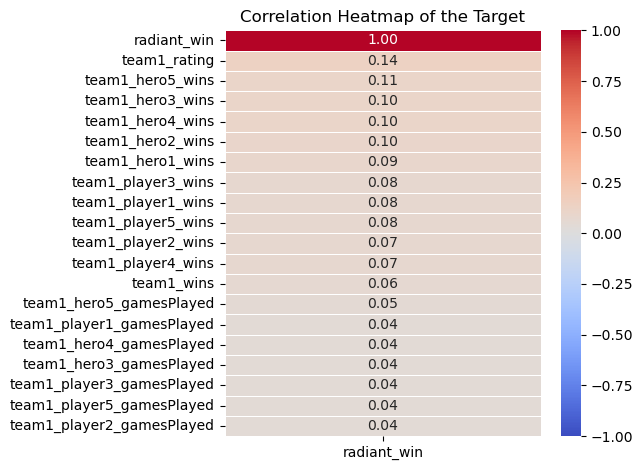

In [59]:
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=20, map_target=False)
plot_heatmap(correlation_matrix)

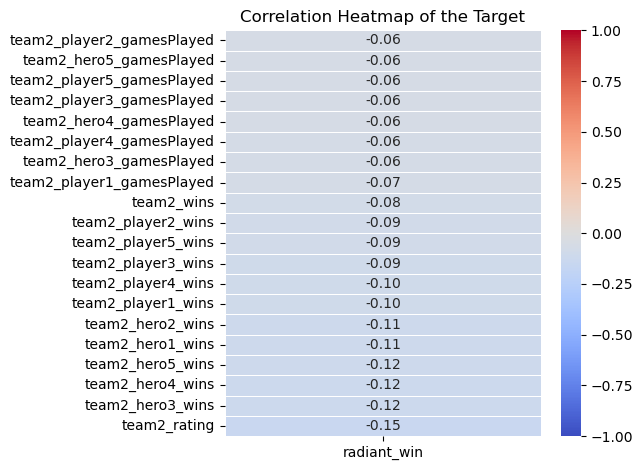

In [60]:
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=-20, map_target=False)
plot_heatmap(correlation_matrix)

### 4. Dimensionality Reduction techniques (feature selection, feature extraction)
- __feature selection (remove uncorrelated columns)__
- __PCA__
- __Kernel PCA__
- __LDA__

__Feature selection (remove uncorrelated columns)__

First of all, we have already discarded the following columns during the dataset scaling.

These are the reasons why we discarded them:
- __'start_time'__ ---> because the column is in date format and we already extracted 6 new features during the 'Datetime columns' section.
- __'team1_last_match_time'__ ---> because the column is in date format and we already extracted a new feature from it
- __'team2_last_match_time'__ ---> because the column is in date format and we already extracted a new feature from it
- __'radiant_name'__ ---> because the column is just a label for this other feature 'team1_id'
- __'dire_name'__ ---> because the column is just a label for this other feature 'team2_id'
- __'league_name'__ ---> because the column is just a label for this other feature 'leagueid'

Now let's discard more columns, performing a feature selection.

Let's discard these 2 columns because they are exactly the same as another column:
- __radiant_team_id__ ---> team1_id
- __dire_team_id__ ---> team2_id

Let's also find the most uncorrelated columns to our target.

In [61]:
display_shape_and_colnames(df_scaled, colnames=False)

# Rows: 17077
# Columns: 97


In [62]:
# drop repeated columns
repeated_columns = ['radiant_team_id', 'dire_team_id']
df_scaled.drop(repeated_columns, axis=1, inplace=True)

In [63]:
def get_target_uncorrelated_features(df, target, thresh=0.1):
    df_corr = df.copy()
    correlation_matrix = df_corr.corr()
    correlation_target = correlation_matrix[[target]].sort_values(by=target, ascending=False)
    correlation_filter_1 = correlation_target[target] >= -thresh
    correlation_filter_2 = correlation_target[target] <= thresh
    return correlation_target[correlation_filter_1 & correlation_filter_2]

correlation_matrix = get_target_uncorrelated_features(df_scaled, 'radiant_win')
correlation_matrix

radiant_win
team1_hero2_wins       0.096817
team1_hero1_wins       0.091914
team1_player3_wins     0.077701
team1_player1_wins     0.077580
team1_player5_wins     0.075684
...                         ...
team2_player2_wins    -0.091415
team2_player5_wins    -0.092622
team2_player3_wins    -0.094323
team2_player4_wins    -0.095520
team2_player1_wins    -0.098365

[84 rows x 1 columns]

In [64]:
display_shape_and_colnames(correlation_matrix.T, colnames=True)

# Rows: 1
# Columns: 84
Column names: Index(['team1_hero2_wins', 'team1_hero1_wins', 'team1_player3_wins',
       'team1_player1_wins', 'team1_player5_wins', 'team1_player2_wins',
       'team1_player4_wins', 'team1_wins', 'team1_hero5_gamesPlayed',
       'team1_player1_gamesPlayed', 'team1_hero4_gamesPlayed',
       'team1_hero3_gamesPlayed', 'team1_player3_gamesPlayed',
       'team1_player5_gamesPlayed', 'team1_player2_gamesPlayed',
       'team1_player4_gamesPlayed', 'team2_days_last_match',
       'team1_hero2_gamesPlayed', 'team1_hero1_gamesPlayed',
       'start_time_month', 'start_time_week', 'team1_hero1', 'team2_hero2',
       'start_time_hour', 'team2_id', 'team1_ban5', 'team2_ban4', 'team2_ban5',
       'team2_ban6', 'team2_hero1', 'start_time_weekday', 'team1_ban2',
       'team2_ban1', 'leagueid', 'team2_ban2', 'team2_hero3', 'start_time_day',
       'region', 'team2_player1_id', 'team1_ban3', 'team2_hero5', 'team1_ban1',
       'team2_ban7', 'team2_ban3', 'team1_ban6', 

From the 97 columns, 72 have <= 10% of correlation to our target.

Let's get rid of these uncorrelated columns for now.

In [65]:
uncorrelated_columns = correlation_matrix.index.to_list()
df_scaled = df_scaled.drop(uncorrelated_columns, axis=1)
display_shape_and_colnames(df_scaled, colnames=True)

# Rows: 17077
# Columns: 11
Column names: Index(['team1_rating', 'team2_rating', 'team1_hero3_wins', 'team1_hero4_wins',
       'team1_hero5_wins', 'team2_hero1_wins', 'team2_hero2_wins',
       'team2_hero3_wins', 'team2_hero4_wins', 'team2_hero5_wins',
       'radiant_win'],
      dtype='object')


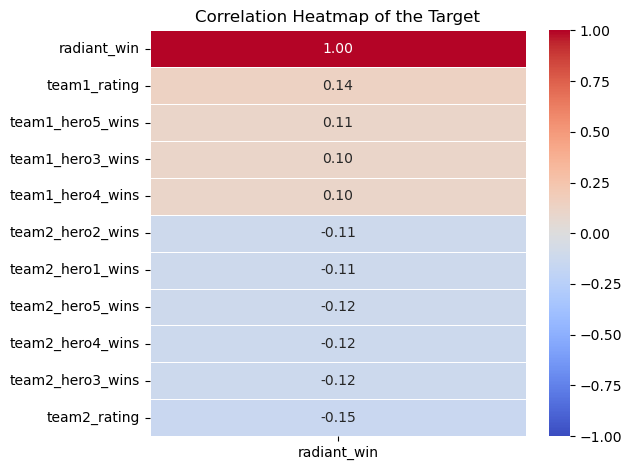

In [66]:
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=25, map_target=False)
plot_heatmap(correlation_matrix)

__PCA__

As we still see low correlation between our remaining features and our target.

Let's try a PCA technique for dimensionality reduction.

In [67]:
from sklearn.decomposition import PCA

# function to extract PCA features from a dataset
def get_pca_features(df, target, n_components, print_=True):
    # get features applying PCA technique
    pca = PCA(n_components = n_components, whiten = True)
    features = df.drop(target, axis=1).to_numpy()
    features_pca = pca.fit_transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_pca.shape[1])
        print('LDA Explained Variance Ratio:', pca.explained_variance_ratio_)
        
    return features_pca

# function to convert numpy features and target into an actual pandas dataframe
def get_dataframe(features, target_name, target):
    df = pd.DataFrame(features)
    df[target_name] = target
    return df

target = 'radiant_win'
pca_features = get_pca_features(df_scaled, target, n_components=0.99)
pca_df = get_dataframe(pca_features, target, df_scaled[target])
pca_df

Original number of features: 10
Reduced number of features: 10
LDA Explained Variance Ratio: [0.51668884 0.14902261 0.1373277  0.05446796 0.02550659 0.02414414
 0.02399799 0.02365453 0.02326899 0.02192065]


0         1         2         3         4         5         6  \
0     -0.680136 -0.943606 -2.473750 -0.442400  0.584600  0.688276  0.139680   
1     -0.672105 -0.915890  0.281711  0.533813  1.003433  0.176624 -0.141913   
2     -0.269362 -0.644791 -2.439805 -0.270235 -0.383137  0.849616 -0.458829   
3      1.321755  0.546666  0.372903  0.483104 -1.703802 -0.025340  0.003125   
4     -0.833341 -0.580535  0.262208  0.672397  0.407080 -0.459340 -0.078777   
...         ...       ...       ...       ...       ...       ...       ...   
17072 -1.181625  0.559173  0.363922  1.247036 -0.335069  0.087745  0.362755   
17073  0.572679 -1.893498 -0.006805  2.315093  1.030031  0.710311 -0.444109   
17074 -0.281393  0.057806 -0.164641  1.567806 -0.569011 -0.829288  0.953345   
17075 -1.449874 -0.212621  0.408798 -1.237211 -1.087279 -0.222932 -0.936950   
17076 -0.807120 -0.364448  1.151533  1.998629 -0.736857  0.577101 -0.058694   

              7         8         9  radiant_win  
0     -0.011089 -1.757456 -1.584061            0  
1      1.547357  1.581739 -1.170645            1  
2     -0.486432 -0.853799 -3.222356            1  
3     -1.116006 -0.040474  0.114248            0  
4     -0.562923 -1.310858  0.322956            1  
...         ...       ...       ...          ...  
17072 -0.071309 -1.119697  1.576122            0  
17073 -2.065795 -0.556547  0.329096            0  
17074  1.300356  3.592285  0.276776            1  
17075  0.955852  0.070372 -0.244139            0  
17076  2.119789 -1.203026  0.976435            1  

[17077 rows x 11 columns]

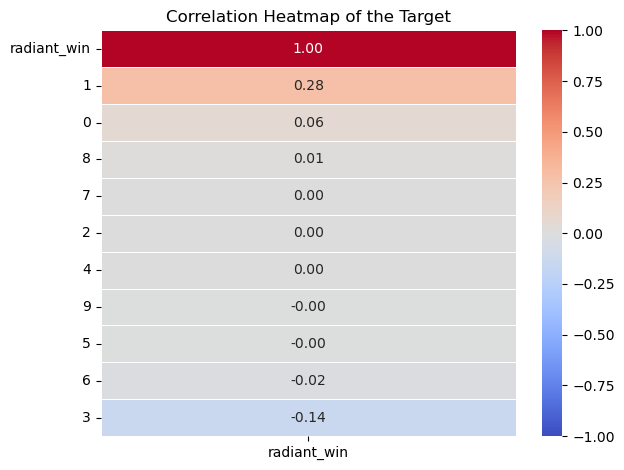

In [68]:
correlation_matrix = get_target_top_correlated_features(pca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

In [69]:
pca_features = get_pca_features(df_scaled, target, n_components=5)
pca_df = get_dataframe(pca_features, target, df_scaled[target])
pca_df

Original number of features: 10
Reduced number of features: 5
LDA Explained Variance Ratio: [0.51668884 0.14902261 0.1373277  0.05446796 0.02550659]


0         1         2         3         4  radiant_win
0     -0.680136 -0.943606 -2.473750 -0.442400  0.584600            0
1     -0.672105 -0.915890  0.281711  0.533813  1.003433            1
2     -0.269362 -0.644791 -2.439805 -0.270235 -0.383137            1
3      1.321755  0.546666  0.372903  0.483104 -1.703802            0
4     -0.833341 -0.580535  0.262208  0.672397  0.407080            1
...         ...       ...       ...       ...       ...          ...
17072 -1.181625  0.559173  0.363922  1.247036 -0.335069            0
17073  0.572679 -1.893498 -0.006805  2.315093  1.030031            0
17074 -0.281393  0.057806 -0.164641  1.567806 -0.569011            1
17075 -1.449874 -0.212621  0.408798 -1.237211 -1.087279            0
17076 -0.807120 -0.364448  1.151533  1.998629 -0.736857            1

[17077 rows x 6 columns]

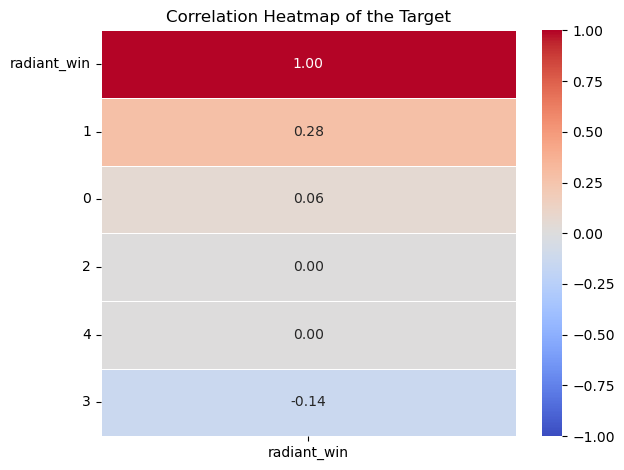

In [70]:
correlation_matrix = get_target_top_correlated_features(pca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

__Kernel PCA__

Let's also try Kernel PCA to check if we have better results, assuming that our data is not linearly separable.

In [ ]:
from sklearn.decomposition import KernelPCA

# function to extract Kernel PCA features from a dataset
def get_kpca_features(df, target, n_components, gamma=15, print_=True):
    # get features applying KPCA technique
    kpca = KernelPCA(kernel="rbf", gamma=gamma, n_components=n_components)
    features = df.drop(target, axis=1).to_numpy()
    features_kpca = kpca.fit_transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_kpca.shape[1])
        
    return features_kpca

kpca_features = get_kpca_features(df_scaled, target, n_components=14)
kpca_df = get_dataframe(kpca_features, target, df_scaled[target])
kpca_df

In [ ]:
correlation_matrix = get_target_top_correlated_features(kpca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

In [ ]:
kpca_features = get_kpca_features(df_scaled, target, n_components=5)
kpca_df = get_dataframe(kpca_features, target, df_scaled[target])
kpca_df

In [ ]:
correlation_matrix = get_target_top_correlated_features(kpca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

It seems that our data is linearly separable as our results with Kernel PCA has worsen our features.

Let's just save the Kernel PCA dataset for now.

__LDA: Linear Discriminant Analysis__

Let's also try an LDA technique to reduce the dimensions maximizing the difference between classes (2 classes: true - false).

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# function to extract lda features from a dataset
def get_lda_features(df, target, n_components, print_=True):
    # get features applying LDA technique
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    features = df.drop(target, axis=1).to_numpy()
    features_lda = lda.fit(features, df[target].to_numpy()).transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_lda.shape[1])
        print('LDA Explained Variance Ratio:', lda.explained_variance_ratio_)
        
    return features_lda, lda

lda_features, lda_model = get_lda_features(df_scaled, target, n_components=1)
lda_df = get_dataframe(lda_features, target, df_scaled[target])
lda_df

In [ ]:
correlation_matrix = get_target_top_correlated_features(lda_df, 'radiant_win', top_n=5, map_target=False)
plot_heatmap(correlation_matrix)

Our results is a unique feature with the best correlation to our target that we have seen so far (50%).

### 5. Using machine learning classification models
- __Split data test & train__
- __Train models & display metric__
- __Hyperparameter tuning__
- __compare models (visualization)__
- __interaction & polynomial features__

__Split data into test & train subsets__

Let's create a function to split our datasets.

In [ ]:
from sklearn.model_selection import train_test_split

# function to split a dataset into test and train subsets
def split_dataset(df, target, test_size=0.3, print_=True):
    # set x features and y target
    x = df.drop([target], axis=1)
    y = df[target]
    
    # split the dataset into x & y - test & train subsets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    if print_:
        print('x_train shape:', x_train.shape)
        print('x_test shape:', x_test.shape)
        print('y_train shape:', y_train.shape)
        print('y_test shape:', y_test.shape) 
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_dataset(df_scaled, 'radiant_win')

__Train models & display metrics__

For this project __we don't have to use an over sampler (data augmentation) because our classes are balanced__.

Let's create functions to train a model and display its classification metrics.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# function to train a model
def train_model(model, x_train, y_train):
    model_fitted = model.fit(x_train, y_train)
    display(model_fitted)
    y_pred_train = model_fitted.predict(x_train)
    y_pred_test = model_fitted.predict(x_test)
    return y_pred_train, y_pred_test

# function to display the classification model metrics
def display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test, test_only=False):
    if not test_only:
        print('- Acuracy Score Train:', accuracy_score(y_train, y_pred_train).round(4))
    print('- Acuracy Score Test:', accuracy_score(y_test, y_pred_test).round(4))
    if not test_only:
        print('- F1 Score Train:', f1_score(y_train, y_pred_train).round(4))
    print('- F1 Score Test:', f1_score(y_test, y_pred_test).round(4))
    print()


Let's test a Logistic Regression model with our defined functions.

In [ ]:
from sklearn.linear_model import LogisticRegression

# testing our 'train_model' and 'display_classifier_metrics' functions
y_pred_train, y_pred_test = train_model(LogisticRegression(), x_train, y_train)
display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)

We have chosen the following ML classification models for this project:
- LogisticRegression
- Random Forest
- Gradient Boosting
- Support Vector Machine

Because these are strong classification algorithms that can help us with our uncorrelated features.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# function to train & test a group of models, displaying each metrics for comparison
def train_and_measure_models(models, x_train, x_test, y_train, y_test, display_metrics=True):
    # loop through the models, train & test and display metrics, save the predictions
    y_predictions = {}
    for model in models:
        name = type(model).__name__ # extract the model name
        y_pred_train, y_pred_test = train_model(model, x_train, y_train) # train & test the model
        y_predictions[name] = (y_pred_train, y_pred_test) # save the predictions into a dictionary
        if display_metrics: # print model's name, accuracy and f1-score
            print("Model:", name)
            display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)
    return y_predictions

# set the models that we will be testing on this project
models = (LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC())

Let's start by train & Test our models using our numeric __Scaled Dataset__

In [ ]:
display_shape_and_colnames(df_scaled)

In [ ]:
# test models using our scaled dataset
x_train, x_test, y_train, y_test = split_dataset(df_scaled, 'radiant_win')
y_predictions_scaled = train_and_measure_models(models, x_train, x_test, y_train, y_test)

Train & Test our models using our __PCA Dataset__

In [ ]:
display_shape_and_colnames(pca_df)

In [ ]:
# test models using our pca dataset
x_train, x_test, y_train, y_test = split_dataset(pca_df, 'radiant_win')
y_predictions_pca = train_and_measure_models(models, x_train, x_test, y_train, y_test)

Train & Test our models using our __Kernel PCA Dataset__

In [ ]:
display_shape_and_colnames(kpca_df)

In [ ]:
# test models using our Kernel PCA dataset
x_train, x_test, y_train, y_test = split_dataset(kpca_df, 'radiant_win')
y_predictions_kpca = train_and_measure_models(models, x_train, x_test, y_train, y_test)

Train & Test our models using our __LDA Dataset__

In [ ]:
display_shape_and_colnames(lda_df)

In [ ]:
# test models using our LDA dataset
x_train, x_test, y_train, y_test = split_dataset(lda_df, 'radiant_win')
y_predictions_lda = train_and_measure_models(models, x_train, x_test, y_train, y_test)

We have seen various results, however, let's __find the best parameters for each model (and for each dataset)__ first, before running into conclusions.

__Hyperparameter tuning__

We will use a Grid Search algorithm for hyperparameter tuning, therefore, we will define our parameter grids for each model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# function to perform hyper parameter tuning on a single of models
def hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test):
    # instantiate grid search cross validation and fit it with training data
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
 
    # print best hyperparameters and accuracy score found
    model_name = type(model).__name__ # extract the model name
    print("Model:", model_name)
    print("- Best Hyperparameters: ", grid_search.best_params_)
    print("- Best Accuracy Score: {:.2f} %".format(grid_search.best_score_ * 100))
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(x_test, y_test)
    print("- Test Accuracy Score: {:.2f} %".format(test_accuracy * 100))
    
    # return the best model
    return best_model

# function to perform hyper parameter tuning on a group of models
def models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test):
    best_models = []
    for model, param_grid in zip(models, param_grids):
        best_model = hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test)
        best_models.append(best_model)
    return tuple(best_models)

# set our parameter grids for each model that we are testing
log_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
},
rf_param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['sqrt', 'log2']
},
gbc_param_grid = {
    'n_estimators': [100, 1000], # [10, 100, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.4, 0.8], # [0.5, 0.7, 1.0],
    'max_depth': [4, 8] # [3, 7, 9]
},
svm_param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 'scale', 'auto'],
    'C': [10, 1.0, 0.1]
}

# set the parameter grids and models
param_grids = [log_param_grid, rf_param_grid, gbc_param_grid, svm_param_grid]
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC()]

__Find the best parameters of our models using the numeric scaled dataset.__

In [ ]:
# split our dataset using the numerical standard-scaled dataset
split_scaled_df = split_dataset(df_scaled, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the Scaled dataset
best_models_df_scaled = models_hyperparameter_tuning(models, param_grids, *split_scaled_df)
best_models_df_scaled

__Find the best parameters of our models using the PCA dataset.__

In [ ]:
# split our dataset using the PCA dataset
split_pca_df = split_dataset(pca_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the PCA dataset
best_models_df_pca = models_hyperparameter_tuning(models, param_grids, *split_pca_df)
best_models_df_pca

__Find the best parameters of our models using the Kernel PCA dataset.__

In [ ]:
# split our dataset using the Kernel PCA dataset
split_kpca_df = split_dataset(kpca_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the Kernel PCA dataset
best_models_df_kpca = models_hyperparameter_tuning(models, param_grids, *split_kpca_df)
best_models_df_kpca

__Find the best parameters of our models using the LDA dataset.__

In [ ]:
# split our dataset using the LDA dataset
split_lda_df = split_dataset(lda_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the LDA dataset
best_models_df_lda = models_hyperparameter_tuning(models, param_grids, *split_lda_df)
best_models_df_lda

With these results, we can see that various models are having and __underfitting__ problems.

And the Kernel PCA show the worst results, indicating that our dataset is linearly separable and doesn't need Kernel PCA technique.

Let's discard the Kernel PCA dataset.

__Compare models (visualization) & tune parameters__

Now that we have best parameters, let's visualize results and compare all models using:
- confusion matrix
- ROC curve

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred_test, labels=None):
    # set the confusion matrix
    matrix = confusion_matrix(y_test, y_pred_test, labels=labels)
    
    # plot the heatmap and set labels
    sns.heatmap(matrix, annot=True, fmt="d")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_roc_curve(y_test, y_pred_test):
    # calculate true & false positive ratios
    false_pos_ratio, true_pos_ratio, thresholds = roc_curve(y_test, y_pred_test)
    # calculate area under the curve of the ROC curve
    area_under_curve = auc(false_pos_ratio, true_pos_ratio)
    
    # plot the actual ROC curve using pyplot
    plt.title('ROC Curve (Receiver Operating Characteristic)')
    plt.plot(false_pos_ratio, true_pos_ratio, 'coral', label = f'AUC = {area_under_curve:.4f}')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Ratio')
    plt.xlabel('False Positive Ratio')
    plt.legend()
    plt.show()

In [ ]:
# this function plots the confusion matrix & roc curve, given the true & predicted labels
def plot_cm_and_roc_from_models(models, y_test, y_pred_test):
    # loop through the models
    for model in models:
        name = type(model).__name__ # extract the model name
        print("Model:", name)
        y_pred_test = model.predict(x_test) # predict values
        plot_confusion_matrix(y_test, y_pred_test) # plot confusion matrix
        plot_roc_curve(y_test, y_pred_test) # plot roc curve

Confusion Matrix & ROC Curve using our numeric __Scaled Dataset__

In [ ]:
# test models using our scaled dataset
x_train, x_test, y_train, y_test = split_dataset(df_scaled, 'radiant_win', print_=False)
plot_cm_and_roc_from_models(best_models_df_scaled, y_test, y_pred_test)

Confusion Matrix & ROC Curve using our __PCA Dataset__

In [ ]:
# test models using our PCA dataset
x_train, x_test, y_train, y_test = split_dataset(pca_df, 'radiant_win', print_=False)
plot_cm_and_roc_from_models(best_models_df_pca, y_test, y_pred_test)

Confusion Matrix & ROC Curve using our __LDA Dataset__

In [ ]:
# test models using our LDA dataset
x_train, x_test, y_train, y_test = split_dataset(lda_df, 'radiant_win', print_=False)
plot_cm_and_roc_from_models(best_models_df_lda, y_test, y_pred_test)

Our PCA models show the worst results than the Standard Scaled and LDA datasets.

Let's discard the PCA dataset.

Amongst the Standard Scaled and LDA datasets the one with better test predictions is the __RandomForest Classifier__.

__Interaction & polynomial features__

As our models present a clearly __underfitting__ problem, let's try to extract features applying __interaction and polynomial features__.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# function to extract feature interactions from a dataset
def split_dataset_feature_interactions(df, target, degree=2, test_size=0.3):
    interaction = PolynomialFeatures(degree = degree, include_bias=False, interaction_only=True) # degree: max number of features to create
    x = df.drop(target, axis=1)
    y = df[target]
    features_interaction = interaction.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(features_interaction, y, test_size=test_size)
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)
    return x_train, x_test, y_train, y_test

# function to extract polynomial features from a dataset
def split_dataset_polynomial_features(df, target, degree=2, test_size=0.3, only_test=False):
    polynomial = PolynomialFeatures(degree = degree, include_bias=False, interaction_only=False) # degree: max number of features to create
    x = df.drop(target, axis=1)
    y = df[target]
    features_polynomial = polynomial.fit_transform(x)
    if only_test:
        y_ = y.to_numpy()
        print('x shape:', features_polynomial.shape)
        print('y shape:', y_.shape)
        return features_polynomial, y_
    x_train, x_test, y_train, y_test = train_test_split(features_polynomial, y, test_size=test_size)
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)
    return x_train, x_test, y_train, y_test

Extract __feature interactions__ from our __Standard Scaled dataset__

In [ ]:
# split our Standard Scaled dataset extracting feature interactions
x_train, x_test, y_train, y_test = split_dataset_feature_interactions(df_scaled, 'radiant_win')
# hyperparameter tuning on our models
best_models_df_scaled = models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test)
# test models and plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_scaled, y_test, y_pred_test)

Extract __polynomial features__ from our __Standard Scaled dataset__

In [ ]:
# split our Standard Scaled dataset extracting polynomial features
x_train, x_test, y_train, y_test = split_dataset_polynomial_features(df_scaled, 'radiant_win')
# hyperparameter tuning on our models
best_models_df_scaled = models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test)
# test models and plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_scaled, y_test, y_pred_test)

Extract __feature interactions__ from our __LDA dataset__

In [ ]:
# split our LDA dataset extracting feature interactions
x_train, x_test, y_train, y_test = split_dataset_feature_interactions(lda_df, 'radiant_win')
# hyperparameter tuning on our models
best_models_df_lda = models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test)
# test models and plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_lda, y_test, y_pred_test)

Extract __polynomial features__ from our __LDA dataset__

In [ ]:
# split our LDA dataset extracting polynomial features
x_train, x_test, y_train, y_test = split_dataset_polynomial_features(lda_df, 'radiant_win', degree=4)
# hyperparameter tuning on our models
best_models_df_lda = models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test)
# test models and plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_lda, y_test, y_pred_test)

Looking at our results, the __feature interactions have overfitted our models and present high train accuracies, but lower test results__.

The __polynomial features however have increased the accuracy of both train & test__ for both the LDA dataset.

The __polynomial features for LDA present a slightly better results__, specially for the __LogisticRegression and SVC__.

These results indicates that our __initial models were too simple and underfitted__, we needed to __add complexity__ to our models, and we achieved __through the use of polynomial features__.

In conlusion our best model is:
- Logistic Regression with an LDA dataset and applying Polynomial Features.

In [ ]:
best_models_df_lda

In [ ]:
model = best_models_df_lda[0]
model

In [ ]:
display_shape_and_colnames(lda_df)

__Saving the best model as a pickle file__

In [ ]:
import pickle

# save the model as pickle file
def save_model_as_pickle(filename, model):
    save_model = open(filename, 'wb')
    pickle.dump(model, save_model)
    save_model.close()

save_model_as_pickle('model.pkl', model)

### 6. Evaluating the model
Let's evaluate our model using unseen data (not from the test or train dataset) to make predictions.

In [ ]:
# load the model from pickle file
model = pickle.load(open('model.pkl', 'rb'))
model

Our evaluation data is on a new CSV file, let's load the data.

In [ ]:
df_evaluation = pd.read_csv('matches_1000.csv')

display_shape_and_colnames(df_evaluation)

Let's apply the __entire pipeline__ that we have defined throughout the project:
1. drop missing values
2. map target values
3. drop non-numeric columns (except date columns)
4. apply log transformation to numeric columns
5. extract features from date columns
6. extract LDA features
7. extract polynomial features
8. split the dataset
9. make the predictions

In [ ]:
# go through our pre-defined pipeline using the evaluation data
def evaluation_pipeline(df_evaluation):
    target = 'radiant_win'
    date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time']
    convert_columns_to_datatime(date_columns)
    df_evaluation.dropna(inplace=True) # drop missing values
    df_evaluation.reset_index(inplace=True, drop=True) # reset indexes
    df_evaluation.replace({False: 0, True: 1}, inplace=True) # label encode target column
    numeric_columns = get_numerical_columns(df_evaluation.drop(date_columns + [target], axis=1)) # get numerical columns without target and date columns
    df_evaluation = df_evaluation[numeric_columns + date_columns + [target]] # drop non-numeric columns
    df_evaluation[numeric_columns] = apply_log_transformation(df_evaluation[numeric_columns]) # apply log transformation
    convert_datetime_columns(df_evaluation, date_columns) # convert date columns to datetime
    df_evaluation = extract_features_from_date_columns(df_evaluation) # extract new features from the date columns
    lda_features = get_lda_features(df_evaluation, target, n_components=1) # extract LDA features
    lda_df = get_dataframe(lda_features, target, df_evaluation[target]) # set our dataset with LDA features and our target
    x, y = split_dataset_polynomial_features(lda_df, target, degree=4, only_test=True) # split and extract polynomial features
    
    # predict match outcomes using our evaluation data
    y_pred = model.predict(x) # predict values    
    return y, y_pred

y, y_pred = evaluation_pipeline(df_evaluation)

In [ ]:
# display metrics, confusion matrix and roc curve
display_classifier_metrics(None, None, y, y_pred, test_only=True)
plot_confusion_matrix(y, y_pred) # plot confusion matrix
plot_roc_curve(y, y_pred) # plot roc curve

Our best model evaluation results still present some considerable number of False Postives and False Negatives.

This may be due to the following:
- __quality of the data__: our initial features had roughly 20% of correlation to our target
- __underfitted model__: we may need more data or even complex models to get better results (limited by time and cpu resources)
- __feature explanation__: our goal & value is to predict the match result before it even starts; therefore, our features describe weak factors about the match (to put into perspective if we used during or post-match features we could get >80% correlated features to our target)

However, __even considering these factors we have a remarkable accuracy of 73% which can help us predict the outcome of real-life DOTA 2 matches before they even start.__

Finally, let's test the model using new data (matches) that haven't event started, therefore we don't know the outcome yet.

In [ ]:
# go through our pre-defined pipeline using the evaluation data
def evaluation_pipeline_without_target(df_evaluation):
    date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time']
    
    df_evaluation.dropna(inplace=True) # drop missing values
    df_evaluation.reset_index(inplace=True, drop=True) # reset indexes
    numeric_columns = get_numerical_columns(df_evaluation.drop(date_columns, axis=1)) # get numerical columns without date columns
    df_evaluation = df_evaluation[numeric_columns + date_columns] # drop non-numeric columns
    df_evaluation[numeric_columns] = apply_log_transformation(df_evaluation[numeric_columns]) # apply log transformation
    convert_datetime_columns(df_evaluation, date_columns) # convert date columns to datetime
    df_evaluation = extract_features_from_date_columns(df_evaluation) # extract new features from the date columns
    lda_features = get_lda_features(df_evaluation, target, n_components=1) # extract LDA features
    lda_df = get_dataframe(lda_features, target, df_evaluation[target]) # set our dataset with LDA features and our target
    x, y = split_dataset_polynomial_features(lda_df, target, degree=4, only_test=True) # split and extract polynomial features
    
    # predict match outcomes using our evaluation data
    y_pred = model.predict(x) # predict values    
    return y, y_pred